# Rogun HPP - Powerhouse Seepage Data Exploration

In [100]:
# data exploration of grouting results for Rogun Powerhhouse (PH) and Transformer Hall (TH)
# work peformed during June & August 2018
# data exploration of seepage monitoring data in Drainage Galleries
# work peformed during September 2018
from math import *
import pandas as pd
import numpy as np
from IPython.core.display import HTML, display

In [101]:
# coding notes
#   no 'for loops' used -> see #JK pattern 


## python setup

In [102]:
# setup for python ecosystem
import json
from math import *
import pandas as pd
import numpy as np
from IPython.core.display import HTML, display
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
from scipy.stats import lognorm
from scipy import stats

In [103]:
# setup for pixiedust data exploration
#!sudo pip install --upgrade pixiedust
#!sudo pip install --user --upgrade pixiedust
import pixiedust
from pixiedust.display import *

In [104]:
# setup for plotly in 'offline' mode                            #ToDo JK: this should be cleaned up and documented
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
print (__version__) # requires version >= 1.9.0

# collect all plotly setups here
import plotly.offline as plotly
from plotly.graph_objs import *

2.2.1


In [105]:
# setup for qgis processing
import sys, os
from qgis.core import QgsApplication
from PyQt4.QtGui import QApplication
app = QApplication([], True)  #True -> window display enabled
QgsApplication.setPrefixPath("/usr", True)
QgsApplication.initQgis()
sys.path.append('/usr/share/qgis/python/plugins')  #export PYTHONPATH not needed in start script
from processing.core.Processing import Processing
Processing.initialize() 
import processing
#from processing.tools import *  #not needed currently

In [106]:
# setup for pandas
# set maximum number of rows to display from a pandas data frame
pd.set_option('display.max_rows', 5000)
# set maximum number of rows to display from a pandas data frame
pd.set_option('display.max_columns',100)

## input alignment data

In [107]:
# input PH, TH stationed alignment data (PH = Powerhouse, TH = Transformer Hall)

# create alignment dataframes from alignment csv data
# Rogun data: x: easting, y: northing
# alignment is chosen at the central longitudinal axis of the PH/TH
# alignment elevation is taken at the machine floor and transformer hall levels

ph_alignment_df = pd.DataFrame.from_records(
data =[
("Begin", "TP", 0.0, 27579.31, 23336.85, 968.20),     #x,y,z midpoint PH downslope (western, river side) end wall
("End", "TP", 221.552, 27793.38, 23279.76, 968.20)],  #x,y,z midpoint PH upslope (eastern) end wall
columns=["Point","Type","Station","Easting","Northing","Elevation"] )

th_alignment_df = pd.DataFrame.from_records(
data =[
("Begin", "TP", 0.0, 27760.50, 23223.29, 990.10),     #x,y,z midpoint TH upslope (eastern) end wall
("End", "TP", 199.606, 27567.53, 23274.33, 990.10)],  #x,y,z midpoint TH downslope (western, river side) end wall
columns=["Point","Type","Station","Easting","Northing","Elevation"] )

# define horizontal offsets to cavern walls perpendicular from alignment (anchor/gouthole locations)
# left offset is negative value of right offset
ph_bh_offset = 10.4  #to right (DS) in direction of stationing
th_bh_offset = 9.4  #to right (US) in direction of stationing

In [199]:
# wrtie alignments to csv data files
alignment_ph =  '/home/kaelin_joseph/projects/RogunHPP/data/out/AlignmentPH.csv'
alignment_th =  '/home/kaelin_joseph/projects/RogunHPP/data/out/AlignmentTH.csv'
ph_alignment_df.to_csv(alignment_ph)
th_alignment_df.to_csv(alignment_th)

In [200]:
ph_alignment_df

Point Type  Station   Easting  Northing  Elevation
0  Begin   TP    0.000  27579.31  23336.85      968.2
1    End   TP  221.552  27793.38  23279.76      968.2

In [201]:
th_alignment_df

Point Type  Station   Easting  Northing  Elevation
0  Begin   TP    0.000  27760.50  23223.29      990.1
1    End   TP  199.606  27567.53  23274.33      990.1

In [111]:
# input DG alignment data (DG = Drainage Gallery)

#  set up project data folder with a structure to organize input/output data (PH/TH, DG for now)      #ToDo JK
#    set working dir for this Notebook                                                                #ToDo JK
#  make this cell a user function, reading an alignment csv and creating a pandas df                                                                        #ToDo JK

#DG4
alignment_dg4 =  '/home/kaelin_joseph/projects/RogunHPP/data/out/AlignmentDg4.csv'

# create alignment_df (dataframe) from Alignment csv
dg4_alignment_df = pd.read_csv(alignment_dg4)
# delete row if only NA are present in row
dg4_alignment_df = dg4_alignment_df.dropna(how = "all")
# round alignment_df to three decimals
dg4_alignment_df = dg4_alignment_df.round(decimals=3)

#dg4_alignment_df

#DG3
alignment_dg3 =  '/home/kaelin_joseph/projects/RogunHPP/data/out/AlignmentDg3.csv'

# create alignment_df (dataframe) from Alignment csv
dg3_alignment_df = pd.read_csv(alignment_dg3)
# delete row if only NA are present in row
dg3_alignment_df = dg3_alignment_df.dropna(how = "all")
# round alignment_df to three decimals
dg3_alignment_df = dg3_alignment_df.round(decimals=3)

#dg3_alignment_df

#DG2
alignment_dg2 =  '/home/kaelin_joseph/projects/RogunHPP/data/out/AlignmentDg2.csv'

# create alignment_df (dataframe) from Alignment csv
dg2_alignment_df = pd.read_csv(alignment_dg2)
# delete row if only NA are present in row
dg2_alignment_df = dg2_alignment_df.dropna(how = "all")
# round alignment_df to three decimals
dg2_alignment_df = dg2_alignment_df.round(decimals=3)


# clean up alignment dataframes following inspection
dg2_alignment_df = dg2_alignment_df.drop(columns =["Unnamed: 0"])

In [112]:
dg3_alignment_df

Unnamed: 0    Easting   Northing  Elevation
0           28  27769.667  23243.668   1024.727
1           27  27770.441  23248.582   1024.618
2           26  27770.267  23253.248   1024.516
3           25  27770.225  23253.552   1024.509
4           24  27769.025  23258.380   1024.400
5           23  27767.202  23262.344   1024.305
6           22  27748.803  23294.524   1023.498
7           21  27746.711  23297.354   1023.421
8           20  27744.937  23298.960   1023.368
9           19  27742.769  23300.346   1023.312
10          18  27739.655  23301.554   1023.239
11          17  27651.040  23324.879   1021.244
12          16  27648.674  23325.288   1021.191
13          15  27646.134  23325.281   1021.136
14          14  27533.242  23315.908   1018.670
15          13  27532.605  23315.570   1018.652
16          12  27532.484  23315.374   1018.647
17          11  27532.411  23314.875   1018.634
18          10  27535.408  23292.533   1018.132
19           9  27535.416  23292.343   1018.128
20           8  27535.392  23292.155   1018.124
21           7  27528.970  23263.028   1017.510
22           6  27528.893  23260.652   1017.460
23           5  27530.018  23255.838   1017.357
24           4  27531.522  23253.187   1017.294
25           3  27532.745  23251.715   1017.254
26           2  27536.734  23248.795   1017.151
27           1  27540.064  23247.659   1017.078
28           0  27576.818  23238.008   1016.297

In [113]:
# station DG alignments
# DG2 - alignment is along crown

# make this into a user function                                                                     #ToDo JK

# make a new pandas dataframe for stationing (preserving original dataframe with csf data)
# parameters to be made function parameters
#alignment_stationed_dg2 = dg2_alignment_df.copy()  #testing using dg2 data
alignment_stationed_dg2 = dg2_alignment_df.copy()
# alignment configuration
start_station = -25.0

# add "id" field
alignment_stationed_dg2["pt_id"] = alignment_stationed_dg2.index

# add "dist_next_stat" referencing length between point n and point n+1
alignment_stationed_dg2["dist_next_stat"] = np.nan
for n in range(0, len(alignment_stationed_dg2)-1):
    # for all points (excdept last) calculate distance between a point and next point trigonometrically
    alignment_stationed_dg2.iloc[n, alignment_stationed_dg2.columns.get_loc("dist_next_stat")] = (
        ((alignment_stationed_dg2.iloc[n +1]["Easting"] - alignment_stationed_dg2.iloc[n]["Easting"])**2
        +(alignment_stationed_dg2.iloc[n +1]["Northing"] - alignment_stationed_dg2.iloc[n]["Northing"])**2 )**(0.5) )

# add 'Station' field
alignment_stationed_dg2["Station"] = np.nan
# set first point 'Station' to input parameter 'start_station'
alignment_stationed_dg2.iloc[0, alignment_stationed_dg2.columns.get_loc("Station")] = start_station
# for all points, 'Station' = sum of "dist_next_stat" for points along alignment previous to this point
for n in range(1, len(alignment_stationed_dg2)):
    distance = (alignment_stationed_dg2.loc[(alignment_stationed_dg2.pt_id.isin(range(0,n))), 
                        "dist_next_stat"])
    distances = distance.tolist()
    alignment_stationed_dg2.iloc[n, alignment_stationed_dg2.columns.get_loc("Station")] = (
                                                                               sum(distances) +start_station)

In [114]:
#alignment_stationed_dg2.head()
alignment_stationed_dg2

Easting   Northing  Elevation  pt_id  dist_next_stat     Station
0   27499.709  23227.256   1001.080      0       15.402687  -25.000000
1   27515.043  23225.803   1000.540      1        2.285990   -9.597313
2   27517.325  23225.668   1000.461      2        1.605000   -7.311323
3   27518.930  23225.669   1000.404      3        0.129062   -5.706323
4   27519.059  23225.673   1000.400      4        3.277569   -5.577261
5   27522.326  23225.936   1000.203      5        0.484516   -2.299692
6   27522.806  23226.002   1000.174      6        5.369107   -1.815176
7   27528.118  23226.783    999.850      7        3.259178    3.553931
8   27531.354  23227.171    999.653      8        0.882279    6.813108
9   27532.233  23227.247    999.600      9        2.376187    7.695388
10  27534.605  23227.388    999.457     10        2.616459   10.071575
11  27537.221  23227.437    999.299     11        3.327443   12.688034
12  27540.547  23227.339    999.098     12        1.665046   16.015477
13  27542.208  23227.223    998.997     13        4.277794   17.680523
14  27546.456  23226.719    998.739     14        8.115672   21.958317
15  27554.477  23225.483    998.250     15        5.407001   30.073989
16  27559.821  23224.660    997.889     16        2.199847   35.480991
17  27562.009  23224.432    997.742     17        1.769191   37.680838
18  27563.778  23224.406    997.624     18        3.247314   39.450029
19  27567.010  23224.721    997.408     19        0.719217   42.697343
20  27567.717  23224.853    997.360     20        4.271383   43.416560
21  27571.943  23225.474    997.074     21        0.068264   47.687943
22  27572.011  23225.480    997.069     22        4.340100   47.756208
23  27576.349  23225.615    996.778     23        0.576500   52.096308
24  27576.925  23225.591    996.739     24        0.538563   52.672808
25  27577.462  23225.550    996.703     25        1.115323   53.211370
26  27578.569  23225.414    996.628     26        6.464965   54.326693
27  27584.956  23224.413    996.196     27        1.879225   60.791658
28  27586.823  23224.199    996.071     28        0.068118   62.670883
29  27586.891  23224.195    996.067     29        1.945722   62.739000
30  27588.836  23224.142    995.937     30        8.783069   64.684722
31  27597.618  23224.279    995.350     31        1.160140   73.467791
32  27598.778  23224.297    995.270     32        1.022744   74.627930
33  27599.800  23224.336    995.200     33        1.022456   75.650674
34  27600.819  23224.420    995.131     34       29.846122   76.673131
35  27630.510  23227.459    993.084     35        0.874419  106.519253
36  27631.382  23227.524    993.023     36        0.285253  107.393672
37  27631.667  23227.536    993.004     37        0.590069  107.678924
38  27632.257  23227.545    992.963     38        4.404540  108.268993
39  27636.661  23227.476    992.661     39        4.996978  112.673534
40  27641.653  23227.253    992.318     40        0.184329  117.670512
41  27641.837  23227.242    992.305     41        4.813013  117.854840
42  27646.636  23226.875    991.975     42        4.771692  122.667853
43  27651.381  23226.371    991.647     43        9.704379  127.439545
44  27660.992  23225.028    990.982     44        0.521323  137.143924
45  27661.509  23224.961    990.946     45        1.070362  137.665247
46  27662.574  23224.854    990.873     46        1.591166  138.735608
47  27664.163  23224.771    990.764     47       21.212431  140.326775
48  27685.370  23224.291    989.309     48        1.126304  161.539206
49  27686.494  23224.219    989.231     49        4.941361  162.665510
50  27691.232  23222.816    988.888     50        4.165411  167.606871
51  27694.613  23220.383    988.600     51        0.787178  171.772282
52  27695.158  23219.815    988.545     52        2.826614  172.559460
53  27696.826  23217.533    988.350     53        2.134774  175.386075
54  27697.753  23215.610    988.185     54        4.501762  177.520848
55  27698.667  23211.202    98

In [115]:
# station DG alignments
# DG3 - alignment is along crown

# make a new pandas dataframe for stationing (preserving original dataframe with csf data)
# parameters to be made function parameters
alignment_stationed_dg3 = dg3_alignment_df.copy()
# alignment configuration
start_station = 0.0

# add "id" field
alignment_stationed_dg3["pt_id"] = alignment_stationed_dg3.index

# add "dist_next_stat" referencing length between point n and point n+1
alignment_stationed_dg3["dist_next_stat"] = np.nan
for n in range(0, len(alignment_stationed_dg3)-1):
    # for all points (excdept last) calculate distance between a point and next point trigonometrically
    alignment_stationed_dg3.iloc[n, alignment_stationed_dg3.columns.get_loc("dist_next_stat")] = (
        ((alignment_stationed_dg3.iloc[n +1]["Easting"] - alignment_stationed_dg3.iloc[n]["Easting"])**2
        +(alignment_stationed_dg3.iloc[n +1]["Northing"] - alignment_stationed_dg3.iloc[n]["Northing"])**2 )**(0.5) )

# add 'Station' field
alignment_stationed_dg3["Station"] = np.nan
# set first point 'Station' to input parameter 'start_station'
alignment_stationed_dg3.iloc[0, alignment_stationed_dg3.columns.get_loc("Station")] = start_station
# for all points, 'Station' = sum of "dist_next_stat" for points along alignment previous to this point
for n in range(1, len(alignment_stationed_dg3)):
    distance = (alignment_stationed_dg3.loc[(alignment_stationed_dg3.pt_id.isin(range(0,n))), 
                        "dist_next_stat"])
    distances = distance.tolist()
    alignment_stationed_dg3.iloc[n, alignment_stationed_dg3.columns.get_loc("Station")] = (
                                                                               sum(distances) +start_station)

In [116]:
#alignment_stationed_dg3.head()
alignment_stationed_dg3

Unnamed: 0    Easting   Northing  Elevation  pt_id  dist_next_stat  \
0           28  27769.667  23243.668   1024.727      0        4.974583   
1           27  27770.441  23248.582   1024.618      1        4.669243   
2           26  27770.267  23253.248   1024.516      2        0.306888   
3           25  27770.225  23253.552   1024.509      3        4.974895   
4           24  27769.025  23258.380   1024.400      4        4.363098   
5           23  27767.202  23262.344   1024.305      5       37.068526   
6           22  27748.803  23294.524   1023.498      6        3.519285   
7           21  27746.711  23297.354   1023.421      7        2.392971   
8           20  27744.937  23298.960   1023.368      8        2.573173   
9           19  27742.769  23300.346   1023.312      9        3.340099   
10          18  27739.655  23301.554   1023.239     10       91.633366   
11          17  27651.040  23324.879   1021.244     11        2.401091   
12          16  27648.674  23325.288   1021.191     12        2.540010   
13          15  27646.134  23325.281   1021.136     13      113.280434   
14          14  27533.242  23315.908   1018.670     14        0.721119   
15          13  27532.605  23315.570   1018.652     15        0.230341   
16          12  27532.484  23315.374   1018.647     16        0.504311   
17          11  27532.411  23314.875   1018.634     17       22.542116   
18          10  27535.408  23292.533   1018.132     18        0.190168   
19           9  27535.416  23292.343   1018.128     19        0.189526   
20           8  27535.392  23292.155   1018.124     20       29.826569   
21           7  27528.970  23263.028   1017.510     21        2.377247   
22           6  27528.893  23260.652   1017.460     22        4.943705   
23           5  27530.018  23255.838   1017.357     23        3.047920   
24           4  27531.522  23253.187   1017.294     24        1.913769   
25           3  27532.745  23251.715   1017.254     25        4.943533   
26           2  27536.734  23248.795   1017.151     26        3.518437   
27           1  27540.064  23247.659   1017.078     27       37.999978   
28           0  27576.818  23238.008   1016.297     28             NaN   

       Station  
0     0.000000  
1     4.974583  
2     9.643826  
3     9.950713  
4    14.925609  
5    19.288707  
6    56.357233  
7    59.876517  
8    62.269489  
9    64.842662  
10   68.182761  
11  159.816127  
12  162.217218  
13  164.757227  
14  278.037662  
15  278.758781  
16  278.989122  
17  279.493433  
18  302.035549  
19  302.225717  
20  302.415243  
21  332.241812  
22  334.619059  
23  339.562765  
24  342.610685  
25  344.524454  
26  349.467987  
27  352.986424  
28  390.986402

In [117]:
# # configure project layout as basemap
# # consider making this a class, all data as attributes, then easier to use with plotly
# project = 'RogunHPP'
# crs = 'EPSG:3857'  #WGS84 Pseudo Mercator
# #layout_n,layout_s,layout_e,layout_w = 25020, 20880, 28490, 26040  #from grass mapset in Basemap
# layout_n,layout_s,layout_e,layout_w = 25012, 20880, 28490, 26040  #corrected visually
# #layoutPDF = 'data/in/images/RogunHPP.Layout_c_r.png'
# layoutPDF = 'https://storage.googleapis.com/jjk-test/RogunHPP.Layout_c_r.png'

In [118]:
# configure geological map as basemap
# consider making this a class, all data as attributes, then easier to use with plotly               #ToDo JK
project = 'RogunHPP'
crs = 'EPSG:3857'  #WGS84 Pseudo Mercator
layout_n,layout_s,layout_e,layout_w = 24200, 22500, 28550, 27000  #corrected visually
geologyPDF = 'https://storage.googleapis.com/jjk-test/RogunHPP.GeologicalMap.png'

## input measurement and testing data

In [119]:
# input PH/TH grouting results data

#datafile = 'data/Rogun/2018.05.20.Grouting_Data.csv'
#datafile = 'data/Rogun/2018.05.20.Grouting_Data_fixed.csv'
datafile = 'data/Rogun/2018.06.12.Grouting_Data_fixed.csv'

# df = pd.read_csv(datafile, names=names)
#data_df = pd.read_csv(datafile, parse_dates=True, dayfirst=True)  #testing
data_df = pd.read_csv(datafile, dayfirst=True, encoding='latin-1')  #needed for pixiedust
#data_df = pd.read_csv(datafile, dayfirst=True, encoding='utf8')  #tried to fix garbled 'Hole' str, NG
#print(data_df.count())

# drop records (rows) without Date entry  #two records dropped
data_df = data_df.dropna(subset=['Date'])  #drop all rows that have any NaN values
#print(data_df.count())

# use international data format ('coerce’ sets invalid dates to NaT)
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%d/%m/%Y', errors='coerce')

# data fixes based on field observations of grout leakage into openings
data_df.drop(data_df[data_df['Nr'] == 637].index, inplace=True)  #AD-12 stage 1
data_df.drop(data_df[data_df['Nr'] == 729].index, inplace=True)  #AE-23 stage 1 
data_df.drop(data_df[data_df['Nr'] == 1967].index, inplace=True) #AE-23 stage 2
#print(data_df.count())

#data_df
#data_df.head()

In [120]:
# input DG seepage data
# DG2

# change data references to correspond to project folder and working dir                            #ToDo JK

# read seepage measurement data from csv data file
#monitoringDG2 = '/home/kaelin_joseph/projects/RogunHPP/data/in/SeepageMonitoringDG2.csv'  #tested with DG2
monitoringDG2 = '/home/kaelin_joseph/projects/RogunHPP/data/in/SeepageMonitoringDG2.csv'
monitoringDG2_df = pd.read_csv(monitoringDG2, dayfirst=True, encoding='latin-1')  #needed for pixiedust

monitoringDG2_df.head()  #for checking data input

id   station  clock_loc   drainhole hole_depth  collar_elev 22.06.2018  \
0   1  00+74.00         11  dg2_074_11          _        993.0        Wet   
1   2  00+90.50         10  dg2_090_10         50        992.0        Wet   
2   3  01+00.50         11  dg2_100_11         70        991.0        Wet   
3   4  01+20.50          3  dg2_120_03         35        989.5       Damp   
4   5  01+25.00         11  dg2_125_11          _        989.5          _   

  27.06.2018 04.07.2018 11.07.2018 18.07.2018 01.08.2018 16.08.2018  \
0        Wet        Wet        Wet        Wet        Wet        Wet   
1        Wet        Wet        Wet        Wet        Wet        Wet   
2        Wet        Wet        Wet        Wet        Wet        Wet   
3       Damp       Damp       Damp       Damp       Damp       Damp   
4          _        Wet        Wet        Wet        Wet        Wet   

  22.08.2018   appearance geol_layer  
0        Wet            _      K1ob2  
1        Wet            _      K1ob2  
2        Wet            _      K1ob2  
3       Damp  White Stain      K1ob2  
4        Wet            _      K1ob2

In [121]:
# input DG seepage data
# DG3

# read seepage measurement data from csv data file
monitoringDG3 = '/home/kaelin_joseph/projects/RogunHPP/data/in/SeepageMonitoringDG3.csv'
monitoringDG3_df = pd.read_csv(monitoringDG3, dayfirst=True, encoding='latin-1')  #needed for pixiedust

#monitoringDG3_df.head()  #for checking data input
monitoringDG3_df

id   station  clock_loc   drainhole hole_depth  collar_elev 22.06.2018  \
0    1  00+09.00         12   dg3_09_12          _       1023.0          _   
1    2  00+12.00          1  dg3_012_01          _       1022.5        Wet   
2    3  00+12.00          3  dg3_012_03          _       1021.5        Wet   
3    4  00+12.00         12  dg3_012_12          _       1024.0        Wet   
4    5  00+30.00          3  dg3_030_03          _       1019.5        Wet   
5    6  00+30.00         10  dg3_030_10          _       1020.0        Wet   
6    7  00+36.00          3  dg3_036_03          _       1021.5      0.003   
7    8  00+40.00          3  dg3_040_03         56       1022.0      0.070   
8    9  00+40.00          2  dg3_040_02          _       1023.0          _   
9   10  00+40.00          1  dg3_040_01          _       1023.0        Wet   
10  11  00+45.00          3  dg3_045_03         37       1022.0      0.050   
11  12  00+55.00          3  dg3_055_03          _       1022.0      0.100   
12  13  00+56.00          3  dg3_056_03          _       1022.0       Damp   
13  14  00+67.00          3  dg3_067_03         33       1022.0      0.125   
14  15  00+71.00          3  dg3_071_03         35       1022.0      0.450   
15  16  00+77.00          3  dg3_077_03          _       1022.0      0.015   
16  17  00+82.00          3  dg3_082_03         35       1022.0      0.220   
17  18  00+86.00          3  dg3_086_03       32.5       1022.0      0.200   
18  19  00+91.00          3  dg3_091_03         30       1022.0      0.080   
19  20  00+92.00         10  dg3_092_10          _       1023.0      0.003   
20  21  00+96.00          3  dg3_096_03         37       1022.0      0.120   
21  22  01+01.00          3  dg3_101_03          _       1022.0      0.075   
22  23  01+07.00          3  dg3_107_03          _       1022.0      0.025   
23  24  01+10.00          3  dg3_110_03          _       1022.0      0.015   
24  25  01+15.00          2  dg3_115_02          _       1019.0          _   
25  26  01+15.00          3  dg3_115_03          _       1018.0      0.025   
26  27  01+20.00          3  dg3_120_03         39       1018.0      0.250   
27  28  01+25.00          3  dg3_125_03          _       1018.0          _   
28  29  01+27.00         10  dg3_127_10          _       1019.0          _   
29  30  01+30.00          3  dg3_130_03          _       1018.0      0.002   
30  31  01+34.00         10  dg3_134_10          _       1019.0          _   
31  32  01+40.00          3  dg3_140_03          _       1018.0          _   
32  33  01+50.00          3  dg3_150_03          _       1018.0      0.005   
33  34  01+55.00          3  dg3_155_03          _       1018.0          _   
34  35  01+62.00          2  dg3_162_02          _       1018.0          _   
35  36  01+62.00          3  dg3_162_03          _       1018.0        Wet   
36  37  01+68.00          3  dg3_168_03          _       1018.0        Wet   
37  38  01+68.00         12  dg3_168_12          _       1020.0        Wet   
38  39  01+77.00          3  dg3_177_03          _       1018.0        Wet   
39  40  01+77.00         11  dg3_177_11          _       1019.5        Wet   
40  41  01+77.00         12  dg3_177_12          _       1021.0      0.010   
41  42  01+82.00         12  dg3_182_12          _       1021.0       Damp   
42  43  01+84.00         10  dg3_184_10         90       1018.0        Wet   
43  44  01+85.00         12  dg3_185_12          _       1021.0        Wet   
44  45  01+88.00         12  dg3_188_12          _       1021.0          _   
45  46  01+88.00         11  dg3_188_11          _       1019.0      0.005   
46  47  01+89.00         10  dg3_189_10          _       1019.0        Wet   
47  48  01+94.00         10  dg3_194_10         85       1019.0      0.040   
48  49  01+96.00          3  dg3_196_03          _       1018.0          _   
49  50  01+99.00         10  dg3_199_10         70       1018.0        Wet   
50  51  02+04.00         1

In [122]:
# quantify seepage flows reported in DG seepage data
# make this into a user function                                                                    #ToDo JK

# DG2

# add a new column nn.nn.nnnn_q (for mapped flow quantity) for column containing a date
for col in monitoringDG2_df.columns[monitoringDG2_df.columns.str.contains(
                                    pat = '^(0?[1-9]|[12][0-9]|3[01])[\.\-](0?[1-9]|1[012])[\.\-]\d{4}$')]:
    monitoringDG2_df[col+'_q'] = monitoringDG2_df[col]

# map reported seepage flow to numerical quantities
for col in monitoringDG2_df.columns[monitoringDG2_df.columns.str.contains('_q')]:
        monitoringDG2_df.loc[monitoringDG2_df[col] == 'Dry', col] = 0.0
        monitoringDG2_df.loc[monitoringDG2_df[col] == 'Damp', col] = 0.0005
        monitoringDG2_df.loc[monitoringDG2_df[col] == 'Wet', col] = 0.001
        # this is a temporary solution                                                              #ToDo JK
        # complete solution shoud leave numerical values unchaged and set values not set above to 'NaN
        # how to do this without 'if' ??
        monitoringDG2_df.loc[monitoringDG2_df[col] == '_', col] = 'NaN'      

In [123]:
# this must be after "quantify seepage flows reported in DG seepage data"
# otherwise  TypeError: invalid type comparison                                                            ??

# fix station' data, removing '+' 
monitoringDG2_df['station'] = monitoringDG2_df['station']\
                          .astype(str).str.replace(r"[\+']", '')
# convert 'station' data to floats
monitoringDG2_df = monitoringDG2_df.convert_objects(convert_numeric=True)    
    
# check data types in pandas df columns
#monitoringDG2_df.dtypes

In [124]:
# prepare DG seepage flow time series data for check plot

# number of measurement points and of inspections
count_pts = monitoringDG2_df['station'].count()
count_inspections = monitoringDG2_df.columns[monitoringDG2_df.columns.str.contains('_q')].size

# initialize data lists
inspections = [['' for p in range(count_inspections)] for q in range(count_pts)]
seepages = [['' for p in range(count_inspections)] for q in range(count_pts)]
stat_names = [['' for p in range(count_inspections)] for q in range(count_pts)]

# for all measurment points (pandas rows)
for m in range(0,count_pts):
    # for all inspections (selected pandas columns)
    i = 0
    for col in monitoringDG2_df.columns[monitoringDG2_df.columns.str.contains('_q')]:
        # get inspection name (which is inspection date)
        inspections[m][i] = col
        # get measured seepage data 
        seepages[m][i] = monitoringDG2_df[col][m]
        # get measurement point station
        stat_names[m][i] = monitoringDG2_df['station'][m]
        i = i+1

# pack plot data arrays into single list suitable for plotting with plotly                     #JK pattern
dg2_data = zip(inspections, seepages, stat_names)

In [125]:
# quantify seepage flows reported in DG seepage data
# DG3

# add a new column nn.nn.nnnn_q (for mapped flow quantity) for column containing a date
for col in monitoringDG3_df.columns[monitoringDG3_df.columns.str.contains(
                                    pat = '^(0?[1-9]|[12][0-9]|3[01])[\.\-](0?[1-9]|1[012])[\.\-]\d{4}$')]:
    monitoringDG3_df[col+'_q'] = monitoringDG3_df[col]

# map reported seepage flow to numerical quantities
for col in monitoringDG3_df.columns[monitoringDG3_df.columns.str.contains('_q')]:
        monitoringDG3_df.loc[monitoringDG3_df[col] == 'Dry', col] = 0.0
        monitoringDG3_df.loc[monitoringDG3_df[col] == 'Damp', col] = 0.0005
        monitoringDG3_df.loc[monitoringDG3_df[col] == 'Wet', col] = 0.001
        # this is a temporary solution                                                              #ToDo JK
        # complete solution shoud leave numerical values unchaged and set values not set above to 'NaN
        # how to do this without 'if' ??
        monitoringDG3_df.loc[monitoringDG3_df[col] == '_', col] = 'NaN'      

In [126]:
monitoringDG3_df

id   station  clock_loc   drainhole hole_depth  collar_elev 22.06.2018  \
0    1  00+09.00         12   dg3_09_12          _       1023.0          _   
1    2  00+12.00          1  dg3_012_01          _       1022.5        Wet   
2    3  00+12.00          3  dg3_012_03          _       1021.5        Wet   
3    4  00+12.00         12  dg3_012_12          _       1024.0        Wet   
4    5  00+30.00          3  dg3_030_03          _       1019.5        Wet   
5    6  00+30.00         10  dg3_030_10          _       1020.0        Wet   
6    7  00+36.00          3  dg3_036_03          _       1021.5      0.003   
7    8  00+40.00          3  dg3_040_03         56       1022.0      0.070   
8    9  00+40.00          2  dg3_040_02          _       1023.0          _   
9   10  00+40.00          1  dg3_040_01          _       1023.0        Wet   
10  11  00+45.00          3  dg3_045_03         37       1022.0      0.050   
11  12  00+55.00          3  dg3_055_03          _       1022.0      0.100   
12  13  00+56.00          3  dg3_056_03          _       1022.0       Damp   
13  14  00+67.00          3  dg3_067_03         33       1022.0      0.125   
14  15  00+71.00          3  dg3_071_03         35       1022.0      0.450   
15  16  00+77.00          3  dg3_077_03          _       1022.0      0.015   
16  17  00+82.00          3  dg3_082_03         35       1022.0      0.220   
17  18  00+86.00          3  dg3_086_03       32.5       1022.0      0.200   
18  19  00+91.00          3  dg3_091_03         30       1022.0      0.080   
19  20  00+92.00         10  dg3_092_10          _       1023.0      0.003   
20  21  00+96.00          3  dg3_096_03         37       1022.0      0.120   
21  22  01+01.00          3  dg3_101_03          _       1022.0      0.075   
22  23  01+07.00          3  dg3_107_03          _       1022.0      0.025   
23  24  01+10.00          3  dg3_110_03          _       1022.0      0.015   
24  25  01+15.00          2  dg3_115_02          _       1019.0          _   
25  26  01+15.00          3  dg3_115_03          _       1018.0      0.025   
26  27  01+20.00          3  dg3_120_03         39       1018.0      0.250   
27  28  01+25.00          3  dg3_125_03          _       1018.0          _   
28  29  01+27.00         10  dg3_127_10          _       1019.0          _   
29  30  01+30.00          3  dg3_130_03          _       1018.0      0.002   
30  31  01+34.00         10  dg3_134_10          _       1019.0          _   
31  32  01+40.00          3  dg3_140_03          _       1018.0          _   
32  33  01+50.00          3  dg3_150_03          _       1018.0      0.005   
33  34  01+55.00          3  dg3_155_03          _       1018.0          _   
34  35  01+62.00          2  dg3_162_02          _       1018.0          _   
35  36  01+62.00          3  dg3_162_03          _       1018.0        Wet   
36  37  01+68.00          3  dg3_168_03          _       1018.0        Wet   
37  38  01+68.00         12  dg3_168_12          _       1020.0        Wet   
38  39  01+77.00          3  dg3_177_03          _       1018.0        Wet   
39  40  01+77.00         11  dg3_177_11          _       1019.5        Wet   
40  41  01+77.00         12  dg3_177_12          _       1021.0      0.010   
41  42  01+82.00         12  dg3_182_12          _       1021.0       Damp   
42  43  01+84.00         10  dg3_184_10         90       1018.0        Wet   
43  44  01+85.00         12  dg3_185_12          _       1021.0        Wet   
44  45  01+88.00         12  dg3_188_12          _       1021.0          _   
45  46  01+88.00         11  dg3_188_11          _       1019.0      0.005   
46  47  01+89.00         10  dg3_189_10          _       1019.0        Wet   
47  48  01+94.00         10  dg3_194_10         85       1019.0      0.040   
48  49  01+96.00          3  dg3_196_03          _       1018.0          _   
49  50  01+99.00         10  dg3_199_10         70       1018.0        Wet   
50  51  02+04.00         1

In [127]:
# this must be after "quantify seepage flows reported in DG seepage data"
# otherwise  TypeError: invalid type comparison                                                            ??

# fix station' data, removing '+' 
monitoringDG3_df['station'] = monitoringDG3_df['station']\
                          .astype(str).str.replace(r"[\+']", '')
# convert 'station' data to floats
monitoringDG3_df = monitoringDG3_df.convert_objects(convert_numeric=True)    
    
# check data types in pandas df columns
#monitoringDG3_df.dtypes

In [128]:
# prepare DG seepage flow time series data for check plot

# number of measurement points and of inspections
count_pts = monitoringDG3_df['station'].count()
count_inspections = monitoringDG3_df.columns[monitoringDG3_df.columns.str.contains('_q')].size

# initialize data lists
inspections = [['' for p in range(count_inspections)] for q in range(count_pts)]
seepages = [['' for p in range(count_inspections)] for q in range(count_pts)]
stat_names = [['' for p in range(count_inspections)] for q in range(count_pts)]

# for all measurment points (pandas rows)
for m in range(0,count_pts):
    # for all inspections (selected pandas columns)
    i = 0
    for col in monitoringDG3_df.columns[monitoringDG3_df.columns.str.contains('_q')]:
        # get inspection name (which is inspection date)
        inspections[m][i] = col
        # get measured seepage data 
        seepages[m][i] = monitoringDG3_df[col][m]
        # get measurement point station
        stat_names[m][i] = monitoringDG3_df['station'][m]
        i = i+1

# pack plot data arrays into single list suitable for plotting with plotly
dg3_data = zip(inspections, seepages, stat_names)

In [129]:
monitoringDG2_df.head()  #for checking data

id  station  clock_loc   drainhole  hole_depth  collar_elev  22.06.2018  \
0   1     74.0         11  dg2_074_11         NaN        993.0         NaN   
1   2     90.5         10  dg2_090_10        50.0        992.0         NaN   
2   3    100.5         11  dg2_100_11        70.0        991.0         NaN   
3   4    120.5          3  dg2_120_03        35.0        989.5         NaN   
4   5    125.0         11  dg2_125_11         NaN        989.5         NaN   

   27.06.2018  04.07.2018  11.07.2018  18.07.2018  01.08.2018  16.08.2018  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   22.08.2018   appearance geol_layer  22.06.2018_q  27.06.2018_q  \
0         NaN            _      K1ob2        0.0010        0.0010   
1         NaN            _      K1ob2        0.0010        0.0010   
2         NaN            _      K1ob2        0.0010        0.0010   
3         NaN  White Stain      K1ob2        0.0005        0.0005   
4         NaN            _      K1ob2           NaN           NaN   

   04.07.2018_q  11.07.2018_q  18.07.2018_q  01.08.2018_q  16.08.2018_q  \
0        0.0010        0.0010        0.0010        0.0010        0.0010   
1        0.0010        0.0010        0.0010        0.0010        0.0010   
2        0.0010        0.0010        0.0010        0.0010        0.0010   
3        0.0005        0.0005        0.0005        0.0005        0.0005   
4        0.0010        0.0010        0.0010        0.0010        0.0010   

   22.08.2018_q  
0        0.0010  
1        0.0010  
2        0.0010  
3        0.0005  
4        0.0010

In [130]:
monitoringDG3_df.head()  #for checking data

id  station  clock_loc   drainhole  hole_depth  collar_elev  22.06.2018  \
0   1      9.0         12   dg3_09_12         NaN       1023.0         NaN   
1   2     12.0          1  dg3_012_01         NaN       1022.5         NaN   
2   3     12.0          3  dg3_012_03         NaN       1021.5         NaN   
3   4     12.0         12  dg3_012_12         NaN       1024.0         NaN   
4   5     30.0          3  dg3_030_03         NaN       1019.5         NaN   

   27.06.2018  04.07.2018  11.07.2018  18.07.2018  01.08.2018  16.08.2018  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   22.08.2018 appearance geol_layer  22.06.2018_q  27.06.2018_q  04.07.2018_q  \
0         NaN          _      K1ob2           NaN           NaN           NaN   
1         NaN          _      K1ob2         0.001         0.001         0.001   
2         NaN          _      K1ob2         0.001         0.001         0.001   
3         NaN          _      K1ob2         0.001         0.001         0.001   
4         NaN          _      K1ob2         0.001         0.001         0.001   

   11.07.2018_q  18.07.2018_q  01.08.2018_q  16.08.2018_q  22.08.2018_q  
0           NaN         0.001         0.001         0.001         0.001  
1         0.001         0.001         0.001         0.001         0.001  
2         0.001         0.001         0.001         0.001         0.001  
3         0.001         0.001         0.001         0.001         0.001  
4         0.001         0.001         0.001         0.001         0.001

In [131]:
# check plot time series data from DG seepage measurement data
# DG2

# extract data fields from zip of data and append to plot data as traces
dataPanda = []
for data in dg2_data:
    trace = go.Bar(x = data[0], y = data[1], name=data[2][0])
    dataPanda.append(trace) 

layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=dataPanda, layout=layout)
plotly.iplot(fig, filename='stacked-bar')

In [132]:
# check plot time series data from DG seepage measurement data
# DG3

# extract data fields from zip of data and append to plot data as traces
dataPanda = []
for data in dg3_data:
    trace = go.Bar(x = data[0], y = data[1], name=data[2][0])
    dataPanda.append(trace) 

layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=dataPanda, layout=layout)
plotly.iplot(fig, filename='stacked-bar')

In [133]:
# input DG Lugeon testing data
# DG3

# read Lugeon testing data from csv data file
lugeonDG3_1 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.13.RogunHPP.LugeonDataDG3_1.csv'
lugeonDG3_2 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.13.RogunHPP.LugeonDataDG3_2.csv'
lugeonDG3_3 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.13.RogunHPP.LugeonDataDG3_3.csv'
lugeonDG3_4 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.13.RogunHPP.LugeonDataDG3_4.csv'

lugeonDG3_df = pd.read_csv(lugeonDG3_1, dayfirst=True, encoding='latin-1')  #needed for pixiedust
tmp_df = pd.read_csv(lugeonDG3_2, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG3_df = lugeonDG3_df.append(tmp_df, ignore_index=True)
tmp_df = pd.read_csv(lugeonDG3_3, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG3_df = lugeonDG3_df.append(tmp_df, ignore_index=True)
tmp_df = pd.read_csv(lugeonDG3_4, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG3_df = lugeonDG3_df.append(tmp_df, ignore_index=True)

#lugeonDG3_df.head()  #for checking data input

In [134]:
# fix station' data, removing '+' 
lugeonDG3_df['station'] = lugeonDG3_df['station']\
                          .astype(str).str.replace(r"[\+']", '')
# convert 'station' data to floats
lugeonDG3_df = lugeonDG3_df.convert_objects(convert_numeric=True)    
    
# check data types in pandas df columns
#lugeonDG3_df.dtypes

In [135]:
# input DG Lugeon testing data
# DG2

# read Lugeon testing data from csv data file
lugeonDG2_1 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.18.RogunHPP.LugeonDataDG2_1.csv'
lugeonDG2_2 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.18.RogunHPP.LugeonDataDG2_2.csv'
lugeonDG2_3 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.18.RogunHPP.LugeonDataDG2_3.csv'
lugeonDG2_4 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.18.RogunHPP.LugeonDataDG2_4.csv'
lugeonDG2_5 = '/home/kaelin_joseph/projects/RogunHPP/data/in/2018.09.18.RogunHPP.LugeonDataDG2_5.csv'

lugeonDG2_df = pd.read_csv(lugeonDG2_1, dayfirst=True, encoding='latin-1')  #needed for pixiedust
tmp_df = pd.read_csv(lugeonDG2_2, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG2_df = lugeonDG2_df.append(tmp_df, ignore_index=True)
tmp_df = pd.read_csv(lugeonDG2_3, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG2_df = lugeonDG2_df.append(tmp_df, ignore_index=True)
tmp_df = pd.read_csv(lugeonDG2_4, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG2_df = lugeonDG2_df.append(tmp_df, ignore_index=True)
tmp_df = pd.read_csv(lugeonDG2_5, dayfirst=True, encoding='latin-1')  #needed for pixiedust
lugeonDG2_df = lugeonDG2_df.append(tmp_df, ignore_index=True)

#lugeonDG2_df.head()  #for checking data input

In [136]:
# fix station' data, removing '+' 
lugeonDG2_df['station'] = lugeonDG2_df['station']\
                          .astype(str).str.replace(r"[\+']", '')
# convert 'station' data to floats
lugeonDG2_df = lugeonDG2_df.convert_objects(convert_numeric=True)

# correct stationing to correspond to stationing used for seepage monotoring
# shift stationing +30 m
lugeonDG2_df['station'] = lugeonDG2_df['station'] + 30
    
# check data types in pandas df columns
#lugeonDG3_df.dtypes

In [137]:
lugeonDG3_df
#lugeonDG3_df.head()

stage  station borehole        date  d_up  d_down  stage_l  avg_lugeon
0        1      2.5     DR-1  07/09/2016  34.2    39.2      5.0        2.14
1        2      2.5     DR-1  07/09/2016  29.2    34.2      5.0        2.94
2        3      2.5     DR-1  07/09/2016  24.2    29.2      5.0        1.14
3        4      2.5     DR-1  07/09/2016  19.2    24.2      5.0        0.95
4        5      2.5     DR-1  08/09/2016  14.2    19.2      5.0        1.09
5        6      2.5     DR-1  08/09/2016   9.2    14.2      5.0        0.22
6        7      2.5     DR-1  08/09/2016   4.2     9.2      5.0        0.08
7        8      2.5     DR-1  08/09/2016   1.2     4.2      3.0       11.47
8        1      7.5     DR-2  08/09/2016  23.0    28.0      5.0        5.58
9        2      7.5     DR-2  08/09/2016  18.0    23.0      5.0        2.91
10       3      7.5     DR-2  09/09/2016  13.0    18.0      5.0        1.60
11       4      7.5     DR-2  09/09/2016   8.0    13.0      5.0        0.12
12       5      7.5     DR-2  09/09/2016   3.0     8.0      5.0        1.21
13       6      7.5     DR-2  09/09/2016   1.0     3.0      2.0       16.08
14       1     12.5     DR-3  09/09/2016  33.0    38.0      5.0        4.96
15       2     12.5     DR-3  09/09/2016  28.0    33.0      5.0        1.75
16       3     12.5     DR-3  10/09/2016  23.0    28.0      5.0        0.25
17       4     12.5     DR-3  10/09/2016  18.0    23.0      5.0        0.55
18       5     12.5     DR-3  10/09/2016  13.0    18.0      5.0        0.94
19       6     12.5     DR-3  10/09/2016   8.0    13.0      5.0        1.34
20       7     12.5     DR-3  10/09/2016   3.0     8.0      5.0        0.60
21       8     12.5     DR-3  10/09/2016   1.0     3.0      2.0        2.00
22       1     22.5     DR-5  12/09/2016  34.2    39.2      5.0        4.32
23       2     22.5     DR-5  12/09/2016  29.2    34.2      5.0        2.92
24       3     22.5     DR-5  12/09/2016  24.2    29.2      5.0        0.96
25       4     22.5     DR-5  12/09/2016  19.2    24.2      5.0        0.53
26       5     22.5     DR-5  12/09/2016  14.2    19.2      5.0        0.82
27       6     22.5     DR-5  12/09/2016   9.2    14.2      5.0        0.98
28       7     22.5     DR-5  13/09/2016   4.2     9.2      5.0        0.39
29       8     22.5     DR-5  13/09/2016   1.0     4.2      3.2        0.48
30       1     27.5     DR-6  11/09/2016  28.0    33.0      5.0        3.62
31       2     27.5     DR-6  11/09/2016  23.0    28.0      5.0        1.80
32       3     27.5     DR-6  11/09/2016  18.0    23.0      5.0        1.57
33       4     27.5     DR-6  11/09/2016  13.0    18.0      5.0        0.94
34       5     27.5     DR-6  11/09/2016   8.0    13.0      5.0        0.50
35       6     27.5     DR-6  11/09/2016   3.0     8.0      5.0        1.75
36       7     27.5     DR-6  12/09/2016   1.0     3.0      2.0        2.54
37       1     32.5     DR-7  13/09/2016  32.5    37.5      5.0        2.41
38       2     32.5     DR-7  13/09/2016  27.5    32.5      5.0        1.21
39       3     32.5     DR-7  13/09/2016  22.5    27.5      5.0        1.20
40       4     32.5     DR-7  13/09/2016  17.5    22.5      5.0        4.81
41       5     32.5     DR-7  13/09/2016  12.5    17.5      5.0        0.68
42       6     32.5     DR-7  14/09/2016   7.5    12.5      5.0        0.56
43       7     32.5     DR-7  14/09/2016   2.5     7.5      5.0        0.65
44       8     32.5     DR-7  14/09/2016   1.0     2.5      1.5        4.39
45       1     37.5     DR-8  14/09/2016  34.0    39.0      5.0        2.21
46       2     37.5     DR-8  14/09/2016  29.0    34.0      5.0        0.84
47       3     37.5     DR-8  14/09/2016  24.0    29.0      5.0        0.83
48       4     37.5     DR-8  14/09/2016  19.0    24.0      5.0        0.53
49       5     37.5     DR-8  14/09/2016  14.0    19.0      5.0        0.41
50       6     37.5     DR-8  15/09/2016   9.0    14.0      5.0        1.20
51       7     37.5     DR-8  15/09/2016   4.0     9.

In [138]:
lugeonDG2_df
#lugeonDG2_df.head()

nr  station borehole        date   d_up  d_down  stage_l  avg_lugeon
0     1    88.00     DR-1  13/10/2016  65.00   70.00      5.0    0.043400
1     1    88.00     DR-1  12/10/2016  60.00   65.00      5.0    0.136000
2     1    88.00     DR-1  12/10/2016  55.00   60.00      5.0    0.197600
3     1    88.00     DR-1  12/10/2016  50.00   55.00      5.0    0.045200
4     1    88.00     DR-1  12/10/2016  45.00   50.00      5.0    0.158000
5     1    88.00     DR-1  10/10/2016  40.00   45.00      5.0    0.122600
6     1    88.00     DR-1  10/10/2016  35.00   40.00      5.0    0.244000
7     1    88.00     DR-1  10/10/2016  30.00   35.00      5.0    0.722000
8     1    88.00     DR-1  09/10/2016  25.00   30.00      5.0    0.022000
9     1    88.00     DR-1  09/10/2016  20.00   25.00      5.0    0.040000
10    1    88.00     DR-1  09/10/2016  15.00   20.00      5.0    0.052000
11    1    88.00     DR-1  09/10/2016  10.00   15.00      5.0    0.052500
12    1    88.00     DR-1  09/10/2016   1.40    5.40      4.0    0.047500
13    1    88.00     DR-1  09/10/2016   0.50    5.00      4.5    0.030000
14    2    93.00     DR-2  09/10/2016   1.00    5.00      4.0    5.614000
15    2    93.00     DR-2  09/10/2016   5.00   10.00      5.0    3.540000
16    2    93.00     DR-2  10/10/2016  10.00   15.00      5.0    4.150000
17    2    93.00     DR-2  10/10/2016  15.00   20.00      5.0    0.214000
18    2    93.00     DR-2  09/10/2016  20.00   25.00      5.0    0.331000
19    2    93.00     DR-2  07/10/2016  25.00   30.00      5.0    5.620000
20    2    93.00     DR-2  08/10/2016  30.00   35.00      5.0    0.062000
21    2    93.00     DR-2  08/10/2016  35.00   40.00      5.0    0.068000
22    2    93.00     DR-2  08/10/2016  40.00   45.00      5.0    0.256000
23    2    93.00     DR-2  08/10/2016  45.00   50.00      5.0    0.106000
24    2    93.00     DR-2  08/10/2016  50.00   55.00      5.0    0.012400
25    2    93.00     DR-2  08/10/2016  55.00   60.00      5.0    0.022000
26    3   103.00     DR-4  08/10/2016  60.00   65.00      5.0    0.046000
27    3   103.00     DR-4  08/10/2016  55.00   60.00      5.0    0.052000
28    3   103.00     DR-4  08/10/2016  50.00   55.00      5.0    0.031000
29    3   103.00     DR-4  08/10/2016  45.00   50.00      5.0    0.044800
30    3   103.00     DR-4  07/10/2016  40.00   45.00      5.0    1.600000
31    3   103.00     DR-4  07/10/2016  35.00   40.00      5.0    1.694000
32    3   103.00     DR-4  07/10/2016  30.00   35.00      5.0    2.500000
33    3   103.00     DR-4  07/10/2016  25.00   30.00      5.0    0.110000
34    3   103.00     DR-4  07/10/2016  20.00   25.00      5.0    9.600000
35    3   103.00     DR-4  07/10/2016  15.00   20.00      5.0    2.320000
36    3   103.00     DR-4  07/10/2016  10.00   15.00      5.0    2.080000
37    3   103.00     DR-4  07/10/2016   5.00   10.00      5.0    7.780000
38    3   103.00     DR-4  07/10/2016   0.50    5.00      4.5    4.680000
39    4   108.00     DR-5  06/10/2016   0.50    5.00      4.5    0.650000
40    4   108.00     DR-5  06/10/2016   5.00   10.00      5.0    0.500000
41    5   113.00     DR-6  23/10/2016   1.00    6.00      5.0    6.894000
42    5   113.00     DR-6  23/10/2016   5.00   10.00      5.0    2.957500
43    5   113.00     DR-6  23/10/2016  10.00   15.00      5.0    0.916000
44    5   113.00     DR-6  23/10/2016  15.00   20.00      5.0    0.980000
45    5   113.00     DR-6  23/10/2016  20.00   25.00      5.0    0.653333
46    5   113.00     DR-6  23/10/2016  25.00   30.00      5.0    0.493333
47    5   113.00     DR-6  23/10/2016  30.00   35.00      5.0    0.413333
48    5   113.00     DR-6  23/10/2016  35.00   40.00      5.0    0.570000
49    5   113.00     DR-6  23/10/2016  40.00   45.00      5.0    0.200000
50    5   113.00     DR-6  23/10/2016  45.00   50.00      5.0    0.280000
51    6   118.00     DR-7  06/10/2016   0.50    5.00      4.5    0.862000
52    6   118.00     DR-7  06/10/2016   5.00   10.00      5.0    0.860000
53    7  

In [139]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
lugeonDG3_df['avg_lugeon'].describe()
#lugeonDG3_df['avg_lugeon'].sum()
#lugeonDG3_df['avg_lugeon'].median()
#lugeonDG3_df['avg_lugeon'].std()

count    760.000000
mean       2.881776
std        7.691298
min        0.020000
25%        0.330000
50%        0.830000
75%        2.052500
max       92.540000
Name: avg_lugeon, dtype: float64

In [140]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
lugeonDG2_df['avg_lugeon'].describe()
#lugeonDG3_df['avg_lugeon'].sum()
#lugeonDG3_df['avg_lugeon'].median()
#lugeonDG3_df['avg_lugeon'].std()

count    663.000000
mean       3.447755
std        7.070121
min        0.012400
25%        0.281000
50%        0.810000
75%        3.045000
max       61.200000
Name: avg_lugeon, dtype: float64

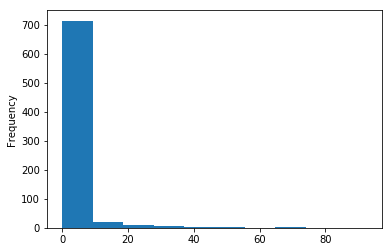

In [141]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
#lugeonDG3_df.plot(kind='scatter', x='station', y='avg_lugeon')
lugeonDG3_df['avg_lugeon'].plot(kind='hist')

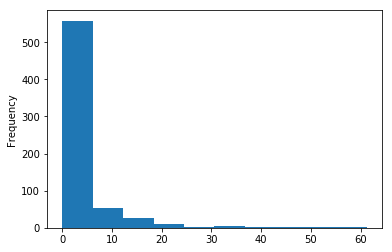

In [142]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
#lugeonDG2_df.plot(kind='scatter', x='station', y='avg_lugeon')
lugeonDG2_df['avg_lugeon'].plot(kind='hist')

In [143]:
# check plot data from DG Lugeon test data (as scatter plot) 
# DG3
near_wall = 10.0

lugeon_test_dg3 = go.Scatter(
    ##x=lugeonDG3_df['station'].tolist(),
    ##y=lugeonDG3_df['avg_lugeon'].tolist(),
    x=lugeonDG3_df.loc[(lugeonDG3_df['d_up'] >= near_wall)]['station'].tolist(),
    y=lugeonDG3_df.loc[(lugeonDG3_df['d_up'] >= near_wall)]['avg_lugeon'].tolist(),
    mode = 'markers',
    marker = dict(
        size = 5,
        ##color = lugeonDG3_df['d_up'].tolist(),
        color = lugeonDG3_df.loc[(lugeonDG3_df['d_up'] >= near_wall)]['d_up'].tolist(),

        # testing colorscales
        #colorscale='Viridis',        
        #colorscale='Jet',
        #colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        #[0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        #[0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'],
        #[1.0, 'rgb(49,54,149)']],
        colorscale = 'Hot',
        
        colorbar=ColorBar(              #legend
                title = 'stage depth',
                len = 0.5,
                thickness = 20),
        #reversescale=True
    ),
    name ="lugeon_test_dg3"
)

data = [lugeon_test_dg3]

#fig = go.Figure(data=data, layout=layout)
#plotly.iplot(fig)
plotly.iplot(data)

In [144]:
# check plot data from DG Lugeon test data (as scatter plot) 
# DG2
near_wall = 10.0

lugeon_test_dg2 = go.Scatter(
    ##x=lugeonDG2_df['station'].tolist(),
    ##y=lugeonDG2_df['avg_lugeon'].tolist(),
    x=lugeonDG2_df.loc[(lugeonDG3_df['d_up'] >= near_wall)]['station'].tolist(),
    y=lugeonDG2_df.loc[(lugeonDG3_df['d_up'] >= near_wall)]['avg_lugeon'].tolist(),
    mode = 'markers',
    marker = dict(
        size = 5,
        ##color = lugeonDG2_df['d_up'].tolist(),
        color = lugeonDG2_df.loc[(lugeonDG2_df['d_up'] >= near_wall)]['d_up'].tolist(),
        colorscale = 'Hot',        
        colorbar=ColorBar(              #legend
                title = 'stage depth',
                len = 0.5,
                thickness = 20),
    ),    
    name ="lugeon_test_dg2"
)

data = [lugeon_test_dg2]

#fig = go.Figure(data=data, layout=layout)
#plotly.iplot(fig)
plotly.iplot(data)

# define procedures for determing coordinate location of measurement points

In [145]:
# function for calculating x,y,z at an arbitrary station along a straight alignment
#   make applicable to bent alignment                                                                #ToDo JK
def align_station(alignment, station):
    # alignment must be a pandas df with Easting, Northing and Elevation column data
    # station data can be scalar or vector
    
    # start of alignment
    x_0 = alignment['Easting'][0]
    y_0 = alignment['Northing'][0]
    z_0 = alignment['Elevation'][0]

    # end of alignment
    x_1 = alignment['Easting'][len(alignment)-1]
    y_1 = alignment['Northing'][len(alignment)-1]
    z_1 = alignment['Elevation'][len(alignment)-1]
    align_horiz_len = sqrt((x_0 - x_1)**2 + (y_0 - y_1)**2)

    # coords of stationed point along alignment
    x_stat = x_0 + ((x_1 - x_0) * station/align_horiz_len)
    y_stat = y_0 + ((y_1 - y_0) * station/align_horiz_len)
    z_stat = z_0 + ((z_1 - z_0) * station/align_horiz_len)
    
    return(x_stat,y_stat,z_stat)                                        #Todo JK also return normal vector ???

# testing
#print(align_station(ph_alignment_df, 221.552/2))  #ok
#print(align_station(ph_alignment_df, data_df["Chainage"]))  #ok
#print(align_station(ph_alignment_df, data_df["Chainage"])[0])  #ok
#print(np.array(align_station(ph_alignment_df, data_df["Chainage"]))[[0,1,2]])  #ok

#data_df.head()

In [146]:
# keep for testing, then remove

# function for calculating x,y,z at an arbitrary station along an alignment
# for bent or straight alignment   
# https://stackoverflow.com/questions/50837829/find-index-of-first-row-closest-to-value-in-pandas-dataframe

x_stat = []
y_stat = []
z_stat = []

def station_alignment_0(alignment, station):
##def align_station(alignment, station):
# need more testing of edge cases before committing station_alignment to replace align_station
# need to check stations in PH data against range of PH stations: station_alignment indicates out of range

    # alignment must be a pandas df with Easting, Northing and Elevation column data
    # station data can be scalar or vector ???
    print('station: ', station)
    idx_station_greater = alignment[(alignment.Station - station) > 0].first_valid_index()
    print('idx_station_greater: ', idx_station_greater)
    if idx_station_greater == None:
        print('Error: station parameter is not in range of alignment stations')
        raise SystemExit()
    idx_station_lesser = idx_station_greater - 1
    print('idx_station_lesser: ', idx_station_lesser)
    
    # preceding station
    x_0 = alignment['Easting'][idx_station_lesser]
    y_0 = alignment['Northing'][idx_station_lesser]
    z_0 = alignment['Elevation'][idx_station_lesser]
    station_lesser = alignment['Station'][idx_station_lesser]
        
    # following station
    x_1 = alignment['Easting'][idx_station_greater]
    y_1 = alignment['Northing'][idx_station_greater]
    z_1 = alignment['Elevation'][idx_station_greater]

    horiz_len = sqrt((x_0 - x_1)**2 + (y_0 - y_1)**2)
    print('align_horiz_len: ' ,horiz_len)
    print('x_0, y_0, z_0 : ' , x_0, y_0, z_0)
    print('x_1, y_1, z_1 : ' , x_1, y_1, z_1)
    
    # coords of stationed point along alignment
    x_station = x_0 + ((x_1 - x_0) * (station-station_lesser)/horiz_len)
    y_station = y_0 + ((y_1 - y_0) * (station-station_lesser)/horiz_len)
    z_station = z_0 + ((z_1 - z_0) * (station-station_lesser)/horiz_len)
    
    x_stat.append(x_station)
    y_stat.append(y_station)
    z_stat.append(z_station)    
    
    return(x_station,y_station,z_station)

In [147]:
# function for calculating x,y,z at an arbitrary station along an alignment
#   for bent or straight alignment   
#   https://stackoverflow.com/questions/50837829/find-index-of-first-row-closest-to-value-in-pandas-dataframe

# initialize x,y,z lists before caling station_alginment()
x_stat = []
y_stat = []
z_stat = []

def station_alignment(alignment, station):
# find next Station greater than an input station
# alignment:a pandas dataframe containing slaignment stations in a 'Stations' column
#                              and containing Easting, Northing and Elevation column data
# station: contains a python list of one of more input stations

# need more testing of edge cases before committing station_alignment to replace align_station

    # for each station value in input vector parameter 
    n = 0    
    for i in station:
        # get dataframe index of next station with stationg greater than input value
        #print('i: ', i)
        #print('station[n]: ', station[n])  #for testing - remove
        idx_station_greater = alignment[(alignment['Station'] - station[n]) > 0].first_valid_index()

        #print('idx_station_greater: ', idx_station_greater)  #for testing - remove 
        # check if a valid greater station was found, exit if valid station not found
        if idx_station_greater == None:
            print('Error: station parameter is not in range of alignment stations')
            raise SystemExit()
            
        idx_station_lesser = idx_station_greater - 1
        station_lesser = alignment['Station'][idx_station_lesser]        
        #print('idx_station_lesser: ', idx_station_lesser)  #for testing - remove 
    
        # x,y,z of preceding station
        x_0 = alignment['Easting'][idx_station_lesser]
        y_0 = alignment['Northing'][idx_station_lesser]
        z_0 = alignment['Elevation'][idx_station_lesser]

        # x,y,z of following station
        x_1 = alignment['Easting'][idx_station_greater]
        y_1 = alignment['Northing'][idx_station_greater]
        z_1 = alignment['Elevation'][idx_station_greater]

        horiz_len = sqrt((x_0 - x_1)**2 + (y_0 - y_1)**2)
        #print('align_horiz_len: ' ,horiz_len)  #for testing - remove 
    
        # coords of input station point along alignment
        x_station = x_0 + ((x_1 - x_0) * (station[n] - station_lesser) / horiz_len)
        y_station = y_0 + ((y_1 - y_0) * (station[n] - station_lesser) / horiz_len)
        z_station = z_0 + ((z_1 - z_0) * (station[n] - station_lesser) / horiz_len)
        #print('x_station, y_station, z_station: ', x_station, y_station, z_station)  #for testing - remove

        # append calculated x,y,z to global lists
        x_stat.append(x_station)
        y_stat.append(y_station)
        z_stat.append(z_station)
        
        n = n + 1

    # return last value (only useful for scalar input)
    # vector input is returned in lists x_stat, y_stat, z_stat
    return(x_station,y_station,z_station)

In [148]:
# function for calculating x,y,z at an arbitrary station along an alignment
#   for bent or straight alignment   
#   https://stackoverflow.com/questions/50837829/find-index-of-first-row-closest-to-value-in-pandas-dataframe

# initialize x,y,z lists before caling station_alginment()
x_stat = []
y_stat = []
z_stat = []
x_norm = []
y_norm = []

def station_alignment2(alignment, station):
# find next Station greater than an input station
# alignment:a pandas dataframe containing slaignment stations in a 'Stations' column
#                              and containing Easting, Northing and Elevation column data
# station: contains a python list of one of more input stations

# need more testing of edge cases before committing station_alignment to replace align_station

    # for each station value in input vector parameter 
    n = 0    
    for i in station:
        # get dataframe index of next station with stationg greater than input value
        #print('i: ', i)
        #print('station[n]: ', station[n])  #for testing - remove
        idx_station_greater = alignment[(alignment['Station'] - station[n]) > 0].first_valid_index()

        #print('idx_station_greater: ', idx_station_greater)  #for testing - remove 
        # check if a valid greater station was found, exit if valid station not found
        if idx_station_greater == None:
            print('Error: station parameter is not in range of alignment stations')
            raise SystemExit()
            
        idx_station_lesser = idx_station_greater - 1
        station_lesser = alignment['Station'][idx_station_lesser]        
        #print('idx_station_lesser: ', idx_station_lesser)  #for testing - remove 
    
        # x,y,z of preceding station
        x_0 = alignment['Easting'][idx_station_lesser]
        y_0 = alignment['Northing'][idx_station_lesser]
        z_0 = alignment['Elevation'][idx_station_lesser]

        # x,y,z of following station
        x_1 = alignment['Easting'][idx_station_greater]
        y_1 = alignment['Northing'][idx_station_greater]
        z_1 = alignment['Elevation'][idx_station_greater]

        horiz_len = sqrt((x_0 - x_1)**2 + (y_0 - y_1)**2)
        #print('align_horiz_len: ' ,horiz_len)  #for testing - remove 

        vect = np.array([x_1-x_0, y_1-y_0])
        # unit normal vector perpendicular to alignment, to right in dir of alignment
        normal_vect = np.array([vect[1], -vect[0]])
        normal_unitvect = normal_vect / horiz_len
        #print(normal_unitvect)
        
        # coords of input station point along alignment
        x_station = x_0 + ((x_1 - x_0) * (station[n] - station_lesser) / horiz_len)
        y_station = y_0 + ((y_1 - y_0) * (station[n] - station_lesser) / horiz_len)
        z_station = z_0 + ((z_1 - z_0) * (station[n] - station_lesser) / horiz_len)
        #print('x_station, y_station, z_station: ', x_station, y_station, z_station)  #for testing - remove

        # append calculated x,y,z to global lists
        x_stat.append(x_station)
        y_stat.append(y_station)
        z_stat.append(z_station)

        # append unit vectors to global lists
        x_norm.append(normal_unitvect[0])
        y_norm.append(normal_unitvect[1])
                
        n = n + 1

    # return tulip with last value of x,y,z station and normal unit vector (only useful for scalar input)
    # vector input is returned in lists x_stat, y_stat, z_stat
    # vector input is returned in lists x_norm, y_norm
    return([x_station,y_station,z_station], normal_unitvect)

In [149]:
# keep for testing station_alignment(alignment, station), then remove

# basic testing of station_alignment(alignment, station)  #testing
#out = station_alignment(alignment_stationed_dg2, [288,289,290])
#print(out)

#x_stat, y_stat, z_stat

# station_alignment() returns for station < initial station !!                                        OK ??

In [150]:
# testing station_alignment(alignment, station)
# Error if a station is within rounding error of end station

# Error
#  ('idx_station_greater: ', None)
#  Error: station parameter is not in range of alignment stations
#  An exception has occurred, use %tb to see the full traceback.
#  SystemExit

# This seems to be due to lack of a tolerance in the Error checking in station_alignment
# If data value = final chainage --> can give error

# Need to fix !!                                                                                       fix !!
# make sure that fix does not break checking at starting and ending chainage value

In [151]:
# python testing (copy to Notes)

#[1,2] -1
# TypeError: unsupported operand type(s) for -: 'list' and 'int'

#[1,2] - [-1,1]
# TypeError: unsupported operand type(s) for -: 'list' and 'list'

#np.array([1,2]) -1
# array([0, 1])

#np.array([1,2]) - [-1, 1]
# array([2, 1])

#np.array([1,2]) - np.array([-1, 1])
# array([2, 1])

#np.array([1,2]) - np.array([-1, 1, 9])
# ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [152]:
# # function for calculating x,y at horizonal offset perpendicular from an alignment station
# #   does not require station_coords to be in df                             #JK keep awhile for reference!!!
# def align_offset(alignment, station, offset):
#     x_0 = alignment['Easting'][0]
#     y_0 = alignment['Northing'][0]
#     x_1 = alignment['Easting'][len(alignment)-1]
#     y_1 = alignment['Northing'][len(alignment)-1]
#     station_coords = align_station(alignment, station)
#     x_stat = station_coords[0]
#     y_stat = station_coords[1]
#     z_stat = station_coords[2]
#     print(x_stat,y_stat,z_stat)
#     vect = np.array([x_1-x_0, y_1-y_0])
#     print(vect)
#     horiz_len = sqrt((x_0 - x_1)**2 + (y_0 - y_1)**2)
#     normal_vect = np.array([vect[1], -vect[0]])
#     normal_unitvect = normal_vect / horiz_len
#     right_offset_coords = np.array([x_stat, y_stat]) + normal_unitvect*offset
#     left_offset_coords = np.array([x_stat, y_stat]) - normal_unitvect*offset
#     x_rt_offset = right_offset_coords[0] 
#     y_rt_offset = right_offset_coords[1] 
#     x_lt_offset = left_offset_coords[0] 
#     y_lt_offset = left_offset_coords[1] 
#     return(x_stat, y_stat, z_stat, x_rt_offset, y_rt_offset, x_lt_offset, y_lt_offset, normal_unitvect)

# # testing
# #print(align_offset_0(ph_alignment_df, 100, 10.4))  #ok
# #print(align_offset_0(ph_alignment_df, data_df["Chainage"], 10.4)[7])  #ok

In [153]:
# function for calculating x,y at horizonal offset perpendicular from an alignment station
#   does requires station_coords to be in df
#   make applicable to bent alignment                                                                #ToDo JK
def align_offset_df(alignment, x_stat, y_stat, z_stat, offset):
    # vector along alignment (assumes alignment to be sraight)
    x_0 = alignment['Easting'][0]
    y_0 = alignment['Northing'][0]
    x_1 = alignment['Easting'][len(alignment)-1]
    y_1 = alignment['Northing'][len(alignment)-1]
    vect = np.array([x_1-x_0, y_1-y_0])
    # unit normal vector perpendicular to alignment, to right in dir of alignment
    horiz_len = sqrt((x_0 - x_1)**2 + (y_0 - y_1)**2)
    normal_vect = np.array([vect[1], -vect[0]])
    normal_unitvect = normal_vect / horiz_len
    # coordinates at point offset pendicular to alignment
    x_offset = x_stat + normal_unitvect[0]*offset
    y_offset = y_stat + normal_unitvect[1]*offset
    return(x_stat, y_stat, z_stat, x_offset, y_offset, normal_unitvect)

# testing
#print(align_offset(ph_alignment_df, 27696.757, 23305.528, 968.2, 10.4))  #ok
#print(align_offset(ph_alignment_df, data_df['x_stat'],data_df['y_stat'],data_df['z_stat'], 10.4))  #ok

In [154]:
# function for calculating x,y,z at horizonal offset perpendicular from a alignment station
#   works for straight or bent alignment
#   requires station_coords, normal vectors and offsets
def offset_alignment(x_stat, y_stat, z_stat, x_norm, y_norm, offset_h, offset_v):
    # coordinates at point offset pendicular to alignment
    x_offset = x_stat + x_norm*offset_h
    y_offset = y_stat + y_norm*offset_h
    z_offset = z_stat + offset_v
    return(x_offset, y_offset, z_offset)

In [155]:
# function for calculating x,y,z at a borehole depth from a collar x,y,z and a borehole normal unit vector
#   assumes boreholes perpedicular to wall in horizontal plane
def borehole_coords_atdepth(offset, x_offset, y_offset, z_offset, norm_unitvect, inclin, depth):
    # determine bh unit vector
    num=len(x_offset)
    # direction of offset from alginment (right is pos, left is neg)
    dir = offset / abs(offset)
    norm_unitvect_x = np.linspace(norm_unitvect[0], norm_unitvect[0], num) *dir
    norm_unitvect_y = np.linspace(norm_unitvect[1], norm_unitvect[1], num) *dir    
    bh_norm_vect = norm_unitvect_x, norm_unitvect_y, np.sin(inclin/180.0 * pi)    
    bh_norm_vect_len = np.sqrt(norm_unitvect[0]**2 +norm_unitvect[1]**2 + np.sin(inclin/180.0 * pi)**2)
    bh_norm_unitvect = bh_norm_vect / bh_norm_vect_len
    # determine coordinates of borehole at given depth
    bh_collar = (x_offset, y_offset, z_offset)
    bh_coords_atdepth = np.array(bh_collar) + bh_norm_unitvect*depth
    return(bh_coords_atdepth)    

In [156]:
# function for calculating x,y,z at a borehole depth from a collar x,y,z and a borehole normal unit vector
#   assumes boreholes perpedicular to alignment
def get_coords_borehole_depth(offset, x_collar, y_collar, z_collar, x_norm, y_norm, bh_inclin, bh_depth):
    # determine bh unit vector
    num=len(x_collar)
    # direction of offset from alginment (right is pos, left is neg)
    dir = offset / abs(offset)
    norm_unitvect_x = x_norm *dir
    norm_unitvect_y = y_norm *dir    
    bh_norm_vect = norm_unitvect_x, norm_unitvect_y, np.sin(bh_inclin/180.0 * pi)    
    bh_norm_vect_len = np.sqrt(norm_unitvect_x**2 + norm_unitvect_y**2 + np.sin(bh_inclin/180.0 * pi)**2)
    bh_norm_unitvect = [[],[],[]]
    bh_norm_unitvect[0] = bh_norm_vect[0] / bh_norm_vect_len
    bh_norm_unitvect[1] = bh_norm_vect[1] / bh_norm_vect_len
    bh_norm_unitvect[2] = bh_norm_vect[2] / bh_norm_vect_len    
    # determine coordinates of borehole at given depth
    bh_collar = (x_collar, y_collar, z_collar)
    bh_coords_atdepth = np.array(bh_collar) + bh_norm_unitvect*bh_depth
    return(bh_coords_atdepth)    

## prepare measurement and tesing data for analysis

In [157]:
# prepare data for PH and TH

# consider data for PH and TH separately
# use 'align_station' to add station coordinates to all stationing in df

# PH
#data_ph = data_df.loc[(data_df['Opening'] == 'PH') & (data_df['Type'] == 'Dowel')]       #JK pattern df filter
#data_ph = data_df.loc[(data_df['Opening'] == 'PH') & (data_df['Location'] == 'DS')]  #for test suite
data_ph = data_df.loc[(data_df['Opening'] == 'PH')]
#data_ph = data_df.loc[(data_df['Opening'] == 'PH') & (data_df['Stage'] == 1)]  #consider only deepest stage
print(len(data_ph))
#data_ph.head()

data_ph['x_stat'], data_ph['y_stat'], data_ph['z_stat'] = (                             #JK pattern df function
    np.array(align_station(ph_alignment_df, data_ph["Chainage"]))[[0,1,2]])
    ####np.array(station_alignment(ph_alignment_df, data_ph["Chainage"]))[[0,1,2]])    #testing

# TH
#data_th = data_df.loc[(data_df['Opening'] == 'THC') & (data_df['Location'] == 'DS')]  #for test suite
data_th = data_df.loc[(data_df['Opening'] == 'THC')]
#data_th = data_df.loc[(data_df['Opening'] == 'THC') & (data_df['Stage'] == 1)]  #consider only deepest stage
print(len(data_th))
#data_th_dowels

data_th['x_stat'], data_th['y_stat'], data_th['z_stat'] = (
    np.array(align_station(th_alignment_df, data_th["Chainage"]))[[0,1,2]])
    ####np.array(station_alignment(th_alignment_df, data_th["Chainage"]))[[0,1,2]])    #testing

1174
1642


In [158]:
# # determine offset from alignment to boreholes according to 'Hole' designatin of borehole
# #                                                                      #documentation of encoding problem!!!
# data_ph['Offset']=np.nan
# data_th['Offset']=np.nan
# holes_ph_us ='AA|AB|AC|AD|AE|AF|AG|AH|AI|AJ|AK|AL'
# holes_ph_ds ='BA|BB|BC|BD|BE|BF|BG|BH|BI|BJ|BK|BL|BM'

# # upstream holes in PH (right from alignment)
# data_ph.loc[data_ph['Hole'].str.contains(holes_ph_us), ['Offset']] = ph_bh_offset
# # downstream holes in PH (left frm alignment)
# data_ph.loc[data_ph['Hole'].str.contains(holes_ph_ds), ['Offset']] = -ph_bh_offset

# #data_ph[data_ph['Hole'].str.contains(holes_ph_us)][['Offset','Hole']]

# print(len(data_ph[data_ph['Hole'].str.contains(holes_ph_us)]))  #582
# print(len(data_ph[data_ph['Hole'].str.contains(holes_ph_ds)]))  #499  => 582 + 499 = 1081
# print(len(data_ph)) #1177
# # Holes w/o value display a garbled string, seemingly due to encoding.
# # This only affect holes on upstream wall.
# # Workaround: set default value of offest to 'ph_bh_offset' 
# # and reset valuoe to -ph_bh_offset for downstream holes.

# data_ph.loc[(data_ph['Offset'] != 10.4) & (data_ph['Offset'] != -10.4)]  
# #  works with 10.4, does not wok with 'ph_bh_offset' ???

In [159]:
# prepare data for PH and TH (continued)
# add to df the offsets from alignment to boreholes according to 'Hole' designation of borehole

data_ph['Offset'] = -ph_bh_offset  #US holes
data_th['Offset'] = th_bh_offset  #US holes

# Powerhouse
holes_ph_us = 'AA|AB|AC|AD|AE|AF|AG|AH|AI|AJ|AK|AL'
holes_ph_ds = 'BA|BB|BC|BD|BE|BF|BG|BH|BI|BJ|BK|BL|BM'

# upstream holes in PH (left from alignment)
#data_ph.loc[data_ph['Hole'].str.contains(holes_ph_us), ['Offset']] = -ph_bh_offset

# downstream holes in PH (right from alignment)
# workaround because of garbled DS data: 'Offset' for downstream holes already set at initiation 
#data_ph.loc[data_ph['Hole'].str.contains(holes_ph_ds), ['Offset']] = ph_bh_offset      #JK pattern df replace

#data_ph[data_ph['Hole'].str.contains(holes_ph_us)][['Offset','Hole']]  #testing
#data_ph.loc[(data_ph['Offset'] != 10.4) & (data_ph['Offset'] != -10.4)]  #0 records

# more garbled data found (in spite of above checking), procedure simplified
data_ph.loc[data_ph['Location'] == 'DS', ['Offset']] = ph_bh_offset

# Transformet Hall
holes_th_us = 'UA|UB|UC|UD|UE|UF|UG|UH|UI|UJ|UK|UL|UM|UN|UO|UP|UQ|UR'
holes_th_ds = 'DA|DB|DC|DD|DE|DF|DG|DH|DI|DJ|DK|DL|DM'
# data fixes due to encoding issues with spreadsheet data causing grabled data
data_th.loc[(data_th['Nr'] == 1385), ['Hole']] = 'UE-5'
data_th.loc[(data_th['Nr'] == 2623), ['Hole']] = 'UE-5'

# upstream holes in TH (right from alignment)
#data_th.loc[data_th['Hole'].str.contains(holes_th_us), ['Offset']] = th_bh_offset

# downstream holes in TH (left frm alignment)
# workaround because of garbled data: 'Offset' for upstream holes already set at initiation 
#data_th.loc[data_th['Hole'].str.contains(holes_th_ds), ['Offset']] = -th_bh_offset

#data_ph[data_ph['Hole'].str.contains(holes_ph_us)][['Offset','Hole']]  #testing
#data_th.loc[(data_th['Offset'] != 9.4) & (data_th['Offset'] != -9.4)]  #0 records

# check fixed records
#print(data_th[(data_df['Nr'] == 1385)][['Nr','Hole','Offset']])  #UE-5, 9.4, ok
#print(data_th[(data_df['Nr'] == 2623)][['Nr','Hole','Offset']])  #UE-5, 9.4, ok

# more garbled suspected, procedure simplified
data_th.loc[data_th['Location'] == 'DS', ['Offset']] = -ph_bh_offset

In [160]:
# prepare data for PH and TH (continued)
# use 'align_offset_df' to add coords for borehole collars to df

data_ph['x_offset'], data_ph['y_offset'], data_ph['z_offset'] = (
    np.array(align_offset_df(ph_alignment_df, 
                             data_ph['x_stat'],data_ph['y_stat'],data_ph['Elevation'],data_ph['Offset']))[[3,4,2]] )

data_th['x_offset'], data_th['y_offset'], data_th['z_offset'] = (
    np.array(align_offset_df(th_alignment_df, 
                             data_th['x_stat'],data_th['y_stat'],data_th['Elevation'],data_th['Offset']))[[3,4,2]] )

#data_ph.head()
#data_ph
#data_th

In [161]:
# prepare data for PH and TH (continued)
# normal unit vectors along PH and TH alignments
#   alginments are straight, normal unit vector applies to entire alignment length
norm_unitvect_ph = (
    align_offset_df(ph_alignment_df,data_ph['x_stat'],data_ph['y_stat'],data_ph['z_stat'],ph_bh_offset))[5] 
print(norm_unitvect_ph)

norm_unitvect_th = (
    align_offset_df(th_alignment_df,data_th['x_stat'],data_th['y_stat'],data_th['z_stat'],th_bh_offset))[5] 
print(norm_unitvect_th)

[-0.25768232 -0.9662297 ]
[0.25570391 0.96675515]


In [162]:
# prepare data for PH and TH (continued)
# use 'borehole_coords_atdepth' to add coords for grouting stage max. depth to df

data_ph['x_stage_max'], data_ph['y_stage_max'], data_ph['z_stage_max'] = (
    np.array(borehole_coords_atdepth(data_ph['Offset'], 
                                     data_ph['x_offset'], data_ph['y_offset'], data_ph['z_offset'],
                                     np.array(norm_unitvect_ph), np.array(data_ph['Inclination']), 
                                     np.array(data_ph['Depth_max'])))[[0,1,2]] )

data_th['x_stage_max'], data_th['y_stage_max'], data_th['z_stage_max'] = (
    np.array(borehole_coords_atdepth(data_th['Offset'], 
                                     data_th['x_offset'], data_th['y_offset'], data_th['z_offset'],
                                     np.array(norm_unitvect_th), np.array(data_th['Inclination']), 
                                     np.array(data_th['Depth_max'])))[[0,1,2]] )

In [163]:
data_ph.head()
#data_th

Nr  Record Opening Location    Type   Hole  Chainage  Elevation  \
0   1       1      PH       DS  Tendon  TBF-1       2.0      972.5   
1   2       2      PH       DS  Tendon  TBK-2       2.9      985.0   
2   3       3      PH       DS  Tendon  TBI-2       4.4      980.0   
3   4       4      PH       DS  Tendon  TBM-2       4.5      990.0   
4   5       5      PH       DS  Tendon  TBE-2       4.5      970.0   

   Inclination  Diameter       Date  Stage  Depth_max  Depth_min  Grout  \
0         10.0     110.0 2016-05-08      1         30         20  189.0   
1         10.0     110.0 2016-03-27      1         30         20  259.0   
2         10.0     110.0 2016-03-30      1         30         20  170.0   
3         10.0     110.0 2016-05-24      1         30         20  270.0   
4         10.0     110.0 2016-05-18      1         30         20  190.0   

   Cement        x_stat        y_stat  z_stat  Offset      x_offset  \
0  204.12  27581.242459  23336.334635   968.2    10.4  27578.562563   
1  279.72  27582.112066  23336.102721   968.2    10.4  27579.432170   
2  183.60  27583.561411  23335.716198   968.2    10.4  27580.881515   
3  291.60  27583.658034  23335.690430   968.2    10.4  27580.978138   
4  205.20  27583.658034  23335.690430   968.2    10.4  27580.978138   

       y_offset  z_offset   x_stage_max   y_stage_max  z_stage_max  
0  23326.285847     972.5  27570.946074  23297.726345   977.632636  
1  23326.053932     985.0  27571.815680  23297.494431   990.132636  
2  23325.667409     980.0  27573.265025  23297.107907   985.132636  
3  23325.641641     990.0  27573.361648  23297.082139   995.132636  
4  23325.641641     970.0  27573.361648  23297.082139   975.132636

In [164]:
# prepare seepage data for DG
# clean up df names (alignment_stationed_dg3, monitoringDG3_df), confusing as is!                    #JK ToDo 
# DG3

x_stat = []
y_stat = []
z_stat = []

station_alignment(alignment_stationed_dg3, monitoringDG3_df['station'])
# output is appended to lists x_stat, y_stat, z_stat (only last result is returned)
x_stat, y_stat, z_stat

# add columns for x,y,z at measurment station points
monitoringDG3_df["x_stat"] = np.nan
monitoringDG3_df["y_stat"] = np.nan
monitoringDG3_df["z_stat"] = np.nan

# for all measruemt points, set x_stat, y_stat, z_stat from station_alignment() output lists
for n in range(0, len(monitoringDG3_df)):
    monitoringDG3_df.iloc[n, monitoringDG3_df.columns.get_loc("x_stat")] = x_stat[n]
    monitoringDG3_df.iloc[n, monitoringDG3_df.columns.get_loc("y_stat")] = y_stat[n]
    monitoringDG3_df.iloc[n, monitoringDG3_df.columns.get_loc("z_stat")] = z_stat[n]
    
monitoringDG3_df.head()

id  station  clock_loc   drainhole  hole_depth  collar_elev  22.06.2018  \
0   1      9.0         12   dg3_09_12         NaN       1023.0         NaN   
1   2     12.0          1  dg3_012_01         NaN       1022.5         NaN   
2   3     12.0          3  dg3_012_03         NaN       1021.5         NaN   
3   4     12.0         12  dg3_012_12         NaN       1024.0         NaN   
4   5     30.0          3  dg3_030_03         NaN       1019.5         NaN   

   27.06.2018  04.07.2018  11.07.2018  18.07.2018  01.08.2018  16.08.2018  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   22.08.2018 appearance geol_layer  22.06.2018_q  27.06.2018_q  04.07.2018_q  \
0         NaN          _      K1ob2           NaN           NaN           NaN   
1         NaN          _      K1ob2         0.001         0.001         0.001   
2         NaN          _      K1ob2         0.001         0.001         0.001   
3         NaN          _      K1ob2         0.001         0.001         0.001   
4         NaN          _      K1ob2         0.001         0.001         0.001   

   11.07.2018_q  18.07.2018_q  01.08.2018_q  16.08.2018_q  22.08.2018_q  \
0           NaN         0.001         0.001         0.001         0.001   
1         0.001         0.001         0.001         0.001         0.001   
2         0.001         0.001         0.001         0.001         0.001   
3         0.001         0.001         0.001         0.001         0.001   
4         0.001         0.001         0.001         0.001         0.001   

         x_stat        y_stat       z_stat  
0  27770.290992  23252.604621  1024.530064  
1  27769.730689  23255.540777  1024.464100  
2  27769.730689  23255.540777  1024.464100  
3  27769.730689  23255.540777  1024.464100  
4  27761.885439  23271.642708  1024.071810

In [165]:
# prepare seepage data for DG
# clean up df names (alignment_stationed_dg3, monitoringDG3_df), confusing as is!                    #JK ToDo 
# DG2

x_stat = []
y_stat = []
z_stat = []

station_alignment(alignment_stationed_dg2, monitoringDG2_df['station'])
# output is appended to lists x_stat, y_stat, z_stat (only last result is returned)
x_stat, y_stat, z_stat

# add columns for x,y,z at measurment station points
monitoringDG2_df["x_stat"] = np.nan
monitoringDG2_df["y_stat"] = np.nan
monitoringDG2_df["z_stat"] = np.nan

# for all measruemt points, set x_stat, y_stat, z_stat from station_alignment() output lists
for n in range(0, len(monitoringDG2_df)):
    monitoringDG2_df.iloc[n, monitoringDG2_df.columns.get_loc("x_stat")] = x_stat[n]
    monitoringDG2_df.iloc[n, monitoringDG2_df.columns.get_loc("y_stat")] = y_stat[n]
    monitoringDG2_df.iloc[n, monitoringDG2_df.columns.get_loc("z_stat")] = z_stat[n]
    
monitoringDG2_df.head()

id  station  clock_loc   drainhole  hole_depth  collar_elev  22.06.2018  \
0   1     74.0         11  dg2_074_11         NaN        993.0         NaN   
1   2     90.5         10  dg2_090_10        50.0        992.0         NaN   
2   3    100.5         11  dg2_100_11        70.0        991.0         NaN   
3   4    120.5          3  dg2_120_03        35.0        989.5         NaN   
4   5    125.0         11  dg2_125_11         NaN        989.5         NaN   

   27.06.2018  04.07.2018  11.07.2018  18.07.2018  01.08.2018  16.08.2018  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   22.08.2018   appearance geol_layer  22.06.2018_q  27.06.2018_q  \
0         NaN            _      K1ob2        0.0010        0.0010   
1         NaN            _      K1ob2        0.0010        0.0010   
2         NaN            _      K1ob2        0.0010        0.0010   
3         NaN  White Stain      K1ob2        0.0005        0.0005   
4         NaN            _      K1ob2           NaN           NaN   

   04.07.2018_q  11.07.2018_q  18.07.2018_q  01.08.2018_q  16.08.2018_q  \
0        0.0010        0.0010        0.0010        0.0010        0.0010   
1        0.0010        0.0010        0.0010        0.0010        0.0010   
2        0.0010        0.0010        0.0010        0.0010        0.0010   
3        0.0005        0.0005        0.0005        0.0005        0.0005   
4        0.0010        0.0010        0.0010        0.0010        0.0010   

   22.08.2018_q        x_stat        y_stat      z_stat  
0        0.0010  27598.150145  23224.287257  995.313300  
1        0.0010  27614.574006  23225.827883  994.182682  
2        0.0010  27624.522032  23226.846106  993.496831  
3        0.0005  27644.474458  23227.040302  992.123637  
4        0.0010  27648.955102  23226.628672  991.814691

In [166]:
# prepare Lugeon testing data for DG
# DG3

x_stat = []
y_stat = []
z_stat = []
x_norm = []
y_norm = []

# call station_alignment() to determine x,y,z and unit normal vectors at testing stations along DG alignment 
station_alignment2(alignment_stationed_dg3, lugeonDG3_df['station'])
# output is appended to lists x_stat, y_stat, z_stat
#x_stat, y_stat, z_stat

# add df columns for x,y,z at Lugeon measurment station points
lugeonDG3_df["x_stat"] = np.nan
lugeonDG3_df["y_stat"] = np.nan
lugeonDG3_df["z_stat"] = np.nan
lugeonDG3_df["x_norm"] = np.nan
lugeonDG3_df["y_norm"] = np.nan

# for all measuremt points, set x_stat, y_stat, z_stat, x_nomr, y_norm from station_alignment() output lists
for n in range(0, len(lugeonDG3_df)):
    lugeonDG3_df.iloc[n, lugeonDG3_df.columns.get_loc("x_stat")] = x_stat[n]
    lugeonDG3_df.iloc[n, lugeonDG3_df.columns.get_loc("y_stat")] = y_stat[n]
    lugeonDG3_df.iloc[n, lugeonDG3_df.columns.get_loc("z_stat")] = z_stat[n]
    lugeonDG3_df.iloc[n, lugeonDG3_df.columns.get_loc("x_norm")] = x_norm[n]
    lugeonDG3_df.iloc[n, lugeonDG3_df.columns.get_loc("y_norm")] = y_norm[n]    
    
lugeonDG3_df.head()

stage  station borehole        date  d_up  d_down  stage_l  avg_lugeon  \
0      1      2.5     DR-1  07/09/2016  34.2    39.2      5.0        2.14   
1      2      2.5     DR-1  07/09/2016  29.2    34.2      5.0        2.94   
2      3      2.5     DR-1  07/09/2016  24.2    29.2      5.0        1.14   
3      4      2.5     DR-1  07/09/2016  19.2    24.2      5.0        0.95   
4      5      2.5     DR-1  08/09/2016  14.2    19.2      5.0        1.09   

         x_stat        y_stat       z_stat    x_norm    y_norm  
0  27770.055977  23246.137554  1024.672222  0.987822 -0.155591  
1  27770.055977  23246.137554  1024.672222  0.987822 -0.155591  
2  27770.055977  23246.137554  1024.672222  0.987822 -0.155591  
3  27770.055977  23246.137554  1024.672222  0.987822 -0.155591  
4  27770.055977  23246.137554  1024.672222  0.987822 -0.155591

In [167]:
# prepare Lugeon testing data for DG
# DG2

x_stat = []
y_stat = []
z_stat = []
x_norm = []
y_norm = []

# call station_alignment() to determine x,y,z and unit normal vectors at testing stations along DG alignment 
station_alignment2(alignment_stationed_dg2, lugeonDG2_df['station'])
# output is appended to lists x_stat, y_stat, z_stat
#x_stat, y_stat, z_stat

# add df columns for x,y,z at Lugeon measurment station points
lugeonDG2_df["x_stat"] = np.nan
lugeonDG2_df["y_stat"] = np.nan
lugeonDG2_df["z_stat"] = np.nan
lugeonDG2_df["x_norm"] = np.nan
lugeonDG2_df["y_norm"] = np.nan

# for all measuremt points, set x_stat, y_stat, z_stat, x_nomr, y_norm from station_alignment() output lists
for n in range(0, len(lugeonDG2_df)):
    lugeonDG2_df.iloc[n, lugeonDG2_df.columns.get_loc("x_stat")] = x_stat[n]
    lugeonDG2_df.iloc[n, lugeonDG2_df.columns.get_loc("y_stat")] = y_stat[n]
    lugeonDG2_df.iloc[n, lugeonDG2_df.columns.get_loc("z_stat")] = z_stat[n]
    lugeonDG2_df.iloc[n, lugeonDG2_df.columns.get_loc("x_norm")] = x_norm[n]
    lugeonDG2_df.iloc[n, lugeonDG2_df.columns.get_loc("y_norm")] = y_norm[n]    
    
lugeonDG2_df.head()

nr  station borehole        date  d_up  d_down  stage_l  avg_lugeon  \
0   1     88.0     DR-1  13/10/2016  65.0    70.0      5.0      0.0434   
1   1     88.0     DR-1  12/10/2016  60.0    65.0      5.0      0.1360   
2   1     88.0     DR-1  12/10/2016  55.0    60.0      5.0      0.1976   
3   1     88.0     DR-1  12/10/2016  50.0    55.0      5.0      0.0452   
4   1     88.0     DR-1  12/10/2016  45.0    50.0      5.0      0.1580   

         x_stat        y_stat      z_stat    x_norm    y_norm  
0  27612.086999  23225.573328  994.354145  0.101822 -0.994803  
1  27612.086999  23225.573328  994.354145  0.101822 -0.994803  
2  27612.086999  23225.573328  994.354145  0.101822 -0.994803  
3  27612.086999  23225.573328  994.354145  0.101822 -0.994803  
4  27612.086999  23225.573328  994.354145  0.101822 -0.994803

In [168]:
print(len(x_stat))
print(len(lugeonDG2_df["x_stat"]))

664
664


In [169]:
# prepare Lugeon testing data for DG (continued)
# DG3

# geometric borehole data from drawings
# DR
offset_dr_h = 2.2
offset_dr_v = -3.0
inclination_dr = 0  #deg
# DL
offset_dl_h = -2.1
offset_dl_v = -2.5
inclination_dl_typ = 20  #deg
inclination_dl_30 = 30  #deg

# add columns for x,y,z at measurement station points
lugeonDG3_df["offset_h"] = np.nan
lugeonDG3_df["offset_v"] = np.nan
lugeonDG3_df["inclination"] = np.nan
lugeonDG3_df["x_collar"] = np.nan
lugeonDG3_df["y_collar"] = np.nan
lugeonDG3_df["z_collar"] = np.nan
lugeonDG3_df["x_stage_down"] = np.nan
lugeonDG3_df["y_stage_down"] = np.nan
lugeonDG3_df["z_stage_down"] = np.nan

# determine offset and inclination column data using borehole column data and write to df column data
lugeonDG3_df.loc[lugeonDG3_df['borehole'].str.contains('DL'), ['offset_h']] = offset_dl_h
lugeonDG3_df.loc[lugeonDG3_df['borehole'].str.contains('DL'), ['offset_v']] = offset_dl_v
#  set typical borehole inclination based on drawing data
lugeonDG3_df.loc[lugeonDG3_df['borehole'].str.contains('DL'), ['inclination']] = inclination_dl_typ
#  set specific borehole inclinations based on drawing data
lugeonDG3_df.loc[(lugeonDG3_df['borehole'].str.contains('DL')) & 
                 ( (lugeonDG3_df['station'] >= 170.0) & (lugeonDG3_df['station'] <= 210.0) ),
                 ['inclination']] = inclination_dl_30
lugeonDG3_df.loc[lugeonDG3_df['borehole'].str.contains('DR'), ['offset_h']] = offset_dr_h
lugeonDG3_df.loc[lugeonDG3_df['borehole'].str.contains('DR'), ['offset_v']] = offset_dr_v
lugeonDG3_df.loc[lugeonDG3_df['borehole'].str.contains('DR'), ['inclination']] = inclination_dr

# calculate x,y,z at borehole collars using offset data and unit normal vector to alignment
lugeonDG3_df['x_collar'], lugeonDG3_df['y_collar'], lugeonDG3_df['z_collar'] = (
    np.array(offset_alignment(
                        lugeonDG3_df['x_stat'], lugeonDG3_df['y_stat'], lugeonDG3_df['z_stat'],
                        lugeonDG3_df['x_norm'], lugeonDG3_df['y_norm'],
                        lugeonDG3_df['offset_h'], lugeonDG3_df['offset_v']))[[0,1,2]] )
        
# calculate x,y,z at stage bottoms using offset data and unit normal vector to alignment
lugeonDG3_df['x_stage_down'], lugeonDG3_df['y_stage_down'], lugeonDG3_df['z_stage_down'] = (
    np.array(get_coords_borehole_depth(
                        lugeonDG3_df['offset_h'], 
                        lugeonDG3_df['x_collar'], lugeonDG3_df['y_collar'], lugeonDG3_df['z_collar'],
                        lugeonDG3_df['x_norm'], lugeonDG3_df['y_norm'],
                        np.array(lugeonDG3_df['inclination']), 
                        # stage depth = 1.0 at borehole collar according to drawings
                        np.array(lugeonDG3_df['d_down'] -1.0)))[[0,1,2]] )

In [170]:
lugeonDG3_df

stage  station borehole        date  d_up  d_down  stage_l  avg_lugeon  \
0        1      2.5     DR-1  07/09/2016  34.2    39.2      5.0        2.14   
1        2      2.5     DR-1  07/09/2016  29.2    34.2      5.0        2.94   
2        3      2.5     DR-1  07/09/2016  24.2    29.2      5.0        1.14   
3        4      2.5     DR-1  07/09/2016  19.2    24.2      5.0        0.95   
4        5      2.5     DR-1  08/09/2016  14.2    19.2      5.0        1.09   
5        6      2.5     DR-1  08/09/2016   9.2    14.2      5.0        0.22   
6        7      2.5     DR-1  08/09/2016   4.2     9.2      5.0        0.08   
7        8      2.5     DR-1  08/09/2016   1.2     4.2      3.0       11.47   
8        1      7.5     DR-2  08/09/2016  23.0    28.0      5.0        5.58   
9        2      7.5     DR-2  08/09/2016  18.0    23.0      5.0        2.91   
10       3      7.5     DR-2  09/09/2016  13.0    18.0      5.0        1.60   
11       4      7.5     DR-2  09/09/2016   8.0    13.0      5.0        0.12   
12       5      7.5     DR-2  09/09/2016   3.0     8.0      5.0        1.21   
13       6      7.5     DR-2  09/09/2016   1.0     3.0      2.0       16.08   
14       1     12.5     DR-3  09/09/2016  33.0    38.0      5.0        4.96   
15       2     12.5     DR-3  09/09/2016  28.0    33.0      5.0        1.75   
16       3     12.5     DR-3  10/09/2016  23.0    28.0      5.0        0.25   
17       4     12.5     DR-3  10/09/2016  18.0    23.0      5.0        0.55   
18       5     12.5     DR-3  10/09/2016  13.0    18.0      5.0        0.94   
19       6     12.5     DR-3  10/09/2016   8.0    13.0      5.0        1.34   
20       7     12.5     DR-3  10/09/2016   3.0     8.0      5.0        0.60   
21       8     12.5     DR-3  10/09/2016   1.0     3.0      2.0        2.00   
22       1     22.5     DR-5  12/09/2016  34.2    39.2      5.0        4.32   
23       2     22.5     DR-5  12/09/2016  29.2    34.2      5.0        2.92   
24       3     22.5     DR-5  12/09/2016  24.2    29.2      5.0        0.96   
25       4     22.5     DR-5  12/09/2016  19.2    24.2      5.0        0.53   
26       5     22.5     DR-5  12/09/2016  14.2    19.2      5.0        0.82   
27       6     22.5     DR-5  12/09/2016   9.2    14.2      5.0        0.98   
28       7     22.5     DR-5  13/09/2016   4.2     9.2      5.0        0.39   
29       8     22.5     DR-5  13/09/2016   1.0     4.2      3.2        0.48   
30       1     27.5     DR-6  11/09/2016  28.0    33.0      5.0        3.62   
31       2     27.5     DR-6  11/09/2016  23.0    28.0      5.0        1.80   
32       3     27.5     DR-6  11/09/2016  18.0    23.0      5.0        1.57   
33       4     27.5     DR-6  11/09/2016  13.0    18.0      5.0        0.94   
34       5     27.5     DR-6  11/09/2016   8.0    13.0      5.0        0.50   
35       6     27.5     DR-6  11/09/2016   3.0     8.0      5.0        1.75   
36       7     27.5     DR-6  12/09/2016   1.0     3.0      2.0        2.54   
37       1     32.5     DR-7  13/09/2016  32.5    37.5      5.0        2.41   
38       2     32.5     DR-7  13/09/2016  27.5    32.5      5.0        1.21   
39       3     32.5     DR-7  13/09/2016  22.5    27.5      5.0        1.20   
40       4     32.5     DR-7  13/09/2016  17.5    22.5      5.0        4.81   
41       5     32.5     DR-7  13/09/2016  12.5    17.5      5.0        0.68   
42       6     32.5     DR-7  14/09/2016   7.5    12.5      5.0        0.56   
43       7     32.5     DR-7  14/09/2016   2.5     7.5      5.0        0.65   
44       8     32.5     DR-7  14/09/2016   1.0     2.5      1.5        4.39   
45       1     37.5     DR-8  14/09/2016  34.0    39.0      5.0        2.21   
46       2     37.5     DR-8  14/09/2016  29.0    34.0      5.0        0.84   
47       3     37.5     DR-8  14/09/2016  24.0    29.0      5.0        0.83   
48       4     37.5     DR-8  14/09/2016  19.0    24.0      5.0        0.53   
49       5     37.5     DR-8  14/09/2016  14.0    19.0 

In [171]:
# prepare Lugeon testing data for DG (continued)
# DG2

# add columns for x,y,z at measurement station points
lugeonDG2_df["offset_h"] = np.nan
lugeonDG2_df["offset_v"] = np.nan
lugeonDG2_df["inclination"] = np.nan
lugeonDG2_df["x_collar"] = np.nan
lugeonDG2_df["y_collar"] = np.nan
lugeonDG2_df["z_collar"] = np.nan
lugeonDG2_df["x_stage_down"] = np.nan
lugeonDG2_df["y_stage_down"] = np.nan
lugeonDG2_df["z_stage_down"] = np.nan

#  set borehole offsets and inclination based on drawing data and write to df column data
# DR Sta 0+50 to 1+00 borehole parameters
offset_dr_h_1 = 1.7
offset_dr_v_1 = -1.7
inclination_dr_1 = 37  #deg
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DR')) & 
                 ( (lugeonDG2_df['station'] >= 52.0) & (lugeonDG2_df['station'] <= 100.0) ),
                 ['offset_h']] = offset_dr_h_1
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DR')) & 
                 ( (lugeonDG2_df['station'] >= 52.0) & (lugeonDG2_df['station'] <= 100.0) ),
                 ['offset_v']] = offset_dr_v_1
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DR')) & 
                 ( (lugeonDG2_df['station'] >= 52.0) & (lugeonDG2_df['station'] <= 100.0) ),
                 ['inclination']] = inclination_dr_1
# DR Sta 1+00 to 2+30
offset_dr_h_2 = 2.0
offset_dr_v_2 = -2.9
inclination_dr_2 = 0
# write borehole parameters to df column data
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DR')) & 
                 ( (lugeonDG2_df['station'] > 100.0) & (lugeonDG2_df['station'] <= 230.0) ),
                 ['offset_h']] = offset_dr_h_2
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DR')) & 
                 ( (lugeonDG2_df['station'] > 100.0) & (lugeonDG2_df['station'] <= 230.0) ),
                 ['offset_v']] = offset_dr_v_2
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DR')) & 
                 ( (lugeonDG2_df['station'] > 100.0) & (lugeonDG2_df['station'] <= 230.0) ),
                 ['inclination']] = inclination_dr_2

# DL borehole parameters
offset_dl_h = -1.7
offset_dl_v = -1.7
# DL Sta 0+30 to 0+65
inclination_dl_1 = 37
# DL Sta 0+65 to 1+22
inclination_dl_2 = 58
# DL Sta 1+22 to 1+38
inclination_dl_3 = 71
# DL Sta 1+38 to 2+10
inclination_dl_4 = 87
# write geometery parameters to df column data
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('DL'), ['offset_h']] = offset_dl_h
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('DL'), ['offset_v']] = offset_dl_v
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DL')) & 
                 ( (lugeonDG2_df['station'] >= 30.0) & (lugeonDG2_df['station'] <= 65.0) ),
                 ['inclination']] = inclination_dl_1
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DL')) & 
                 ( (lugeonDG2_df['station'] > 65.0) & (lugeonDG2_df['station'] <= 122.0) ),
                 ['inclination']] = inclination_dl_2
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DL')) & 
                 ( (lugeonDG2_df['station'] > 122.0) & (lugeonDG2_df['station'] <= 138.0) ),
                 ['inclination']] = inclination_dl_3
lugeonDG2_df.loc[(lugeonDG2_df['borehole'].str.contains('DL')) & 
                 ( (lugeonDG2_df['station'] > 138.0) & (lugeonDG2_df['station'] <= 210.0) ),
                 ['inclination']] = inclination_dl_4

# RR borehole parameters
offset_rr_h = 2.0
offset_rr_v = -2.7
inclination_rr = 2  #deg
# write geometery parameters to df column data
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('RR'), ['offset_h']] = offset_rr_h
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('RR'), ['offset_v']] = offset_rr_v
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('RR'), ['inclination']] = inclination_rr

# BB borehole parameters
offset_bb_h = 0.0
offset_bb_v = 0.0
inclination_bb = 90  #deg
# write geometery parameters to df column data
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('BB'), ['offset_h']] = offset_bb_h
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('BB'), ['offset_v']] = offset_bb_v
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('BB'), ['inclination']] = inclination_bb

# LL borehole parameters
offset_ll_v = -4.5
offset_ll_h = -2.1
inclination_ll = -85  #deg
# write geometery parameters to df column data
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('LL'), ['offset_h']] = offset_ll_h
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('LL'), ['offset_v']] = offset_ll_v
lugeonDG2_df.loc[lugeonDG2_df['borehole'].str.contains('LL'), ['inclination']] = inclination_ll


# calculate x,y,z at borehole collars using offset data and unit normal vector to alignment
lugeonDG2_df['x_collar'], lugeonDG2_df['y_collar'], lugeonDG2_df['z_collar'] = (
    np.array(offset_alignment(
                        lugeonDG2_df['x_stat'], lugeonDG2_df['y_stat'], lugeonDG2_df['z_stat'],
                        lugeonDG2_df['x_norm'], lugeonDG2_df['y_norm'],
                        lugeonDG2_df['offset_h'], lugeonDG2_df['offset_v']))[[0,1,2]] )
        
# calculate x,y,z at stage bottoms using offset data and unit normal vector to alignment
lugeonDG2_df['x_stage_down'], lugeonDG2_df['y_stage_down'], lugeonDG2_df['z_stage_down'] = (
    np.array(get_coords_borehole_depth(
                        lugeonDG2_df['offset_h'],  #to get dir
                        lugeonDG2_df['x_collar'], lugeonDG2_df['y_collar'], lugeonDG2_df['z_collar'],
                        lugeonDG2_df['x_norm'], lugeonDG2_df['y_norm'],
                        np.array(lugeonDG2_df['inclination']), 
                        # stage depth = 1.0 at borehole collar according to drawings
                        np.array(lugeonDG2_df['d_down'] -1.0)))[[0,1,2]] )

In [172]:
lugeonDG2_df

nr  station borehole        date   d_up  d_down  stage_l  avg_lugeon  \
0     1    88.00     DR-1  13/10/2016  65.00   70.00      5.0    0.043400   
1     1    88.00     DR-1  12/10/2016  60.00   65.00      5.0    0.136000   
2     1    88.00     DR-1  12/10/2016  55.00   60.00      5.0    0.197600   
3     1    88.00     DR-1  12/10/2016  50.00   55.00      5.0    0.045200   
4     1    88.00     DR-1  12/10/2016  45.00   50.00      5.0    0.158000   
5     1    88.00     DR-1  10/10/2016  40.00   45.00      5.0    0.122600   
6     1    88.00     DR-1  10/10/2016  35.00   40.00      5.0    0.244000   
7     1    88.00     DR-1  10/10/2016  30.00   35.00      5.0    0.722000   
8     1    88.00     DR-1  09/10/2016  25.00   30.00      5.0    0.022000   
9     1    88.00     DR-1  09/10/2016  20.00   25.00      5.0    0.040000   
10    1    88.00     DR-1  09/10/2016  15.00   20.00      5.0    0.052000   
11    1    88.00     DR-1  09/10/2016  10.00   15.00      5.0    0.052500   
12    1    88.00     DR-1  09/10/2016   1.40    5.40      4.0    0.047500   
13    1    88.00     DR-1  09/10/2016   0.50    5.00      4.5    0.030000   
14    2    93.00     DR-2  09/10/2016   1.00    5.00      4.0    5.614000   
15    2    93.00     DR-2  09/10/2016   5.00   10.00      5.0    3.540000   
16    2    93.00     DR-2  10/10/2016  10.00   15.00      5.0    4.150000   
17    2    93.00     DR-2  10/10/2016  15.00   20.00      5.0    0.214000   
18    2    93.00     DR-2  09/10/2016  20.00   25.00      5.0    0.331000   
19    2    93.00     DR-2  07/10/2016  25.00   30.00      5.0    5.620000   
20    2    93.00     DR-2  08/10/2016  30.00   35.00      5.0    0.062000   
21    2    93.00     DR-2  08/10/2016  35.00   40.00      5.0    0.068000   
22    2    93.00     DR-2  08/10/2016  40.00   45.00      5.0    0.256000   
23    2    93.00     DR-2  08/10/2016  45.00   50.00      5.0    0.106000   
24    2    93.00     DR-2  08/10/2016  50.00   55.00      5.0    0.012400   
25    2    93.00     DR-2  08/10/2016  55.00   60.00      5.0    0.022000   
26    3   103.00     DR-4  08/10/2016  60.00   65.00      5.0    0.046000   
27    3   103.00     DR-4  08/10/2016  55.00   60.00      5.0    0.052000   
28    3   103.00     DR-4  08/10/2016  50.00   55.00      5.0    0.031000   
29    3   103.00     DR-4  08/10/2016  45.00   50.00      5.0    0.044800   
30    3   103.00     DR-4  07/10/2016  40.00   45.00      5.0    1.600000   
31    3   103.00     DR-4  07/10/2016  35.00   40.00      5.0    1.694000   
32    3   103.00     DR-4  07/10/2016  30.00   35.00      5.0    2.500000   
33    3   103.00     DR-4  07/10/2016  25.00   30.00      5.0    0.110000   
34    3   103.00     DR-4  07/10/2016  20.00   25.00      5.0    9.600000   
35    3   103.00     DR-4  07/10/2016  15.00   20.00      5.0    2.320000   
36    3   103.00     DR-4  07/10/2016  10.00   15.00      5.0    2.080000   
37    3   103.00     DR-4  07/10/2016   5.00   10.00      5.0    7.780000   
38    3   103.00     DR-4  07/10/2016   0.50    5.00      4.5    4.680000   
39    4   108.00     DR-5  06/10/2016   0.50    5.00      4.5    0.650000   
40    4   108.00     DR-5  06/10/2016   5.00   10.00      5.0    0.500000   
41    5   113.00     DR-6  23/10/2016   1.00    6.00      5.0    6.894000   
42    5   113.00     DR-6  23/10/2016   5.00   10.00      5.0    2.957500   
43    5   113.00     DR-6  23/10/2016  10.00   15.00      5.0    0.916000   
44    5   113.00     DR-6  23/10/2016  15.00   20.00      5.0    0.980000   
45    5   113.00     DR-6  23/10/2016  20.00   25.00      5.0    0.653333   
46    5   113.00     DR-6  23/10/2016  25.00   30.00      5.0    0.493333   
47    5   113.00     DR-6  23/10/2016  30.00   35.00      5.0    0.413333   
48    5   113.00     DR-6  23/10/2016  35.00   40.00      5.0    0.570000   
49    5   113.00     DR-6  23/10/2016  40.00   45.00      5.0    0.200000   
50    5   113.00     DR-6  23/10/2016  45.00   50.00      5.0    0.280000   
5

# plot measurement and testing data

In [173]:
# plotly default colors
#    '#1f77b4',  // muted blue
#    '#ff7f0e',  // safety orange
#    '#2ca02c',  // cooked asparagus green
#    '#d62728',  // brick red
#    '#9467bd',  // muted purple
#    '#8c564b',  // chestnut brown
#    '#e377c2',  // raspberry yogurt pink
#    '#7f7f7f',  // middle gray
#    '#bcbd22',  // curry yellow-green
#    '#17becf'   // blue-teal

# plotly color picker
# https://plot.ly/ipython-notebooks/color-scales/#qualitative
#!sudo pip install colorlover
import colorlover as cl
from IPython.display import HTML
ryb = cl.scales['10']['div']['RdYlBu']; ryb

['rgb(165,0,38)',
 'rgb(215,48,39)',
 'rgb(244,109,67)',
 'rgb(253,174,97)',
 'rgb(254,224,144)',
 'rgb(224,243,248)',
 'rgb(171,217,233)',
 'rgb(116,173,209)',
 'rgb(69,117,180)',
 'rgb(49,54,149)']

In [174]:
# 2d check plot of alignment and offsets

ph_alignment_plot = go.Scatter(
    x=ph_alignment_df['Easting'].tolist(),
    y=ph_alignment_df['Northing'].tolist(),
    line=dict(width=3,
              #color='#e377c2'),
              color='#17becf'),
    name ="ph_alignment"
)

th_alignment_plot = go.Scatter(
    x=th_alignment_df['Easting'].tolist(),
    y=th_alignment_df['Northing'].tolist(),
    line=dict(width=3,
              #color='#e377c2'),
              color='#9467bd'),
    name ="th_alignment"
)

dg3_alignment_plot = go.Scatter(
    x=dg3_alignment_df['Easting'].tolist(),
    y=dg3_alignment_df['Northing'].tolist(),
    line=dict(width=3,
              #color='#e377c2'),
              color='17becf'),
    name ="dg3_alignment"
)

dg2_alignment_plot = go.Scatter(
    x=dg2_alignment_df['Easting'].tolist(),
    y=dg2_alignment_df['Northing'].tolist(),
    line=dict(width=3,
              #color='#e377c2'),
              color='#9467bd'),
    name ="dg2_alignment"
)

# check_plot = go.Scatter(
#     x=[data_ph['x_stat'][818], data_ph['x_offset'][818]],
#     y=[data_ph['y_stat'][818], data_ph['y_offset'][818]],
#     line=dict(width=3,
#               color='rgb(0, 0, 0)'),
#     name ="check"
# )

ph_station_plot = go.Scatter(
    x=data_ph['x_stat'].tolist(),
    y=data_ph['y_stat'].tolist(),
    mode = "markers",
    hoverinfo = 'none',
    marker = dict(
        size = 5,
        color = '#2ca02c',
    ),
    name ="PH stations"
)

th_station_plot = go.Scatter(
    x=data_th['x_stat'].tolist(),
    y=data_th['y_stat'].tolist(),
    mode = "markers",
    hoverinfo = 'none',
    marker = dict(
        size = 5,
        color = '#2ca02c',
    ),
    name ="TH stations"
)

ph_offset_plot = go.Scatter(
    x=data_ph['x_offset'].tolist(),
    y=data_ph['y_offset'].tolist(),
    mode = "markers",
    hoverinfo = 'none',
    marker = dict(
        size = 5,
        color = '#d62728',
    ),
    name ="PH collars"
)

th_offset_plot = go.Scatter(
    x=data_th['x_offset'].tolist(),
    y=data_th['y_offset'].tolist(),
    mode = "markers",
    hoverinfo = 'none',
    marker = dict(
        size = 5,
        color = '#d62728',
    ),
    name ="TH collars"
)

ph_stage_plot = go.Scatter(
    x=data_ph['x_stage_max'].tolist(),
    y=data_ph['y_stage_max'].tolist(),
    mode = "markers",
    #hoverinfo = 'none',
    hoverinfo = data_ph['Chainage'],                                                       #displays x, y ???
    marker = dict(
        size = 5,
        color = '#17becf',
    ),
    name ="PH grout stages"    
)

th_stage_plot = go.Scatter(
    x=data_th['x_stage_max'].tolist(),
    y=data_th['y_stage_max'].tolist(),
    mode = "markers",
    hoverinfo = 'none',
    marker = dict(
        size = 5,
        color = '#9467bd',
    ),
    name ="TH grout stages"    
)


dg3_stage_plot = go.Scatter(
    x=lugeonDG3_df['x_stage_down'].tolist(),
    y=lugeonDG3_df['y_stage_down'].tolist(),
    mode = "markers",
    #hoverinfo = 'none',
    hoverinfo = 'text',
    text = lugeonDG3_df['station'].tolist(),
    marker = dict(
        size = 5,
        color = '#17becf',
    ),
    name ="DG3 Lugeon tests"    
)

dg2_stage_plot = go.Scatter(
    x=lugeonDG2_df['x_stage_down'].tolist(),
    y=lugeonDG2_df['y_stage_down'].tolist(),
    mode = "markers",
    #hoverinfo = 'none',
    hoverinfo = 'text',
    text = lugeonDG2_df['station'].tolist(),
    marker = dict(
        size = 5,
        color = '#9467bd',
    ),
    name ="DG2 Lugeon tests"    
)

# data = [ph_alignment_plot, th_alignment_plot, ph_station_plot, th_station_plot, 
#         ph_offset_plot, th_offset_plot, ph_stage_plot, th_stage_plot]
#data = [dg3_alignment_plot, dg3_stage_plot]
#data = [ph_alignment_plot, th_alignment_plot, dg2_alignment_plot, dg2_stage_plot]
data = [ph_alignment_plot, th_alignment_plot, dg3_alignment_plot, dg3_stage_plot, dg2_alignment_plot, dg2_stage_plot]

# layout = go.Layout(
#     width=1000,
#     height=1000,    
#     xaxis=dict(
#     range = [27500,27800]
#     ),
#     yaxis=dict(
#         range = [23200,23500]
#     ),
# )

layout = go.Layout(    
                   ##yaxis = dict(scaleanchor="x", scaleratio=1),  #needed??
                   # display project Basemap
#                    images= [dict(
#                        ##source = layoutPDF,
#                        source = geologyPDF,
#                        xref = "x",
#                        yref = "y",
#                        xanchor = 'left',
#                        yanchor = 'top',
#                        x = layout_w,
#                        y = layout_n,
#                        sizex= layout_e - layout_w,
#                        sizey= layout_n - layout_s,                  
#                        sizing= "stretch",
#                        #sizing= "contain",
#                        opacity= 0.5, #0.15,
#                        visible = True,
#                        #layer= "below")]
#                        layer= "above")],
                   title='Grouting Layout',
                       width=1000,
                       height=800,
                       scene=dict(
                           aspectratio=dict(
                               x=1,
                               y=1,
                               z=1
                           ),
                       )
        )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, show_link=False)


In [175]:
# setup for plotly 3d mesh from triangular planes
# https://plot.ly/python/surface-triangulation/

import matplotlib.cm as cm

def map_z2color(zval, colormap, vmin, vmax):
    #map the normalized value zval to a corresponding color in the colormap

    if vmin>vmax:
        raise ValueError('incorrect relation between vmin and vmax')
    t=(zval-vmin)/float((vmax-vmin))#normalize val
    R, G, B, alpha=colormap(t)
    return 'rgb('+'{:d}'.format(int(R*255+0.5))+','+'{:d}'.format(int(G*255+0.5))+\
           ','+'{:d}'.format(int(B*255+0.5))+')'
    
    
def tri_indices(simplices):
    #simplices is a numpy array defining the simplices of the triangularization
    #returns the lists of indices i, j, k

    return ([triplet[c] for triplet in simplices] for c in range(3))


#def plotly_trisurf(x, y, z, simplices, fcolor, plot_edges=None):
def plotly_trisurf(x, y, z, simplices, fcolor, plot_edges=True):
    #x, y, z are lists of coordinates of the triangle vertices 
    #simplices are the simplices that define the triangularization;
    #simplices  is a numpy array of shape (no_triangles, 3)
    #insert here the  type check for input data

    points3D=np.vstack((x,y,z)).T
    tri_vertices=map(lambda index: points3D[index], simplices)# vertices of the surface triangles     
    zmean=[np.mean(tri[:,2]) for tri in tri_vertices ]# mean values of z-coordinates of 
                                                      #triangle vertices
#     min_zmean=np.min(zmean)
#     max_zmean=np.max(zmean)
#     facecolor=[map_z2color(zz,  colormap, min_zmean, max_zmean) for zz in zmean]
    #facecolor=['orange' for zz in zmean]
    facecolor=[fcolor for zz in zmean]

    I,J,K=tri_indices(simplices)

    triangles=go.Mesh3d(x=x,
                     y=y,
                     z=z,
                     facecolor=facecolor,
                     i=I,
                     j=J,
                     k=K,
                     name=''
                    )

    if plot_edges is None:# the triangle sides are not plotted 
        return [triangles]
    else:
        #define the lists Xe, Ye, Ze, of x, y, resp z coordinates of edge end points for each triangle
        #None separates data corresponding to two consecutive triangles
        lists_coord=[[[T[k%3][c] for k in range(4)]+[ None]   for T in tri_vertices]  for c in range(3)]
        Xe, Ye, Ze=[reduce(lambda x,y: x+y, lists_coord[k]) for k in range(3)]

        #define the lines to be plotted
        lines=go.Scatter3d(x=Xe,
                        y=Ye,
                        z=Ze,
                        mode='lines',
                        line=dict(color= 'rgb(50,50,50)', width=1.5)
               )
        return triangles, lines

In [176]:
# # set display width to 100%
# # https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [232]:
# 3d visualization with plotly
from scipy.spatial import Delaunay

# plot geological layers as triangulated planar surfaces
# sandstone/siltstone contact crossing PH and TH
x = [27652.8, 27470.3, 27645.2, (27652.8 + (27652.8 - 27470.3)), (27652.8 + (27652.8 - 27645.2)) ]
y = [23334.1, 23291.9, 23548.0, (23334.1 + (23334.1 - 23291.9)), (23334.1 + (23334.1 - 23548.0))]
z = [959.7, 1227.5, 1240.5, (959.7 + (959.7 - 1227.5)), (959.7 + (959.7 - 1240.5))]
points2D=np.vstack([x,y]).T
tri=Delaunay(points2D)
#triangles, lines = plotly_trisurf(x,y,z, tri.simplices, fcolor='orange', plot_edges=True)
# assign only triangles to element to allow multiple plot elements in go.Figure
sandstone = plotly_trisurf(x,y,z, tri.simplices, fcolor='rgb(211, 50, 195)', plot_edges=True)[0]

# siltstone/sandstione contact crossing PH and TH
#   for visualization taken 0.1m lower than sandstone/siltstone contact 
x = [27652.8, 27470.3, 27645.2, (27652.8 + (27652.8 - 27470.3)), (27652.8 + (27652.8 - 27645.2)) ]
y = [23334.1, 23291.9, 23548.0, (23334.1 + (23334.1 - 23291.9)), (23334.1 + (23334.1 - 23548.0))]
z = [959.6, 1227.4, 1240.4, (959.6 + (959.6 - 1227.4)), (959.6 + (959.7 - 1240.4))]
points2D=np.vstack([x,y]).T
tri=Delaunay(points2D)
#triangles, lines = plotly_trisurf(x,y,z, tri.simplices, fcolor='orange', plot_edges=True)
siltstone = plotly_trisurf(x,y,z, tri.simplices, fcolor='rgb(38, 124, 55)', plot_edges=True)[0]

# fault crossing vicinity of PH and TH
x = [28421.4,27749.1, 27654.2]
y = [23164.8, 22904.6, 23328.3]
z = [1364.5, 1189.9, 876.7]
points2D=np.vstack([x,y]).T
tri=Delaunay(points2D)
#triangles, lines = plotly_trisurf(x,y,z, tri.simplices, fcolor='orange', plot_edges=True)
fault = plotly_trisurf(x,y,z, tri.simplices, fcolor='red', plot_edges=True)[0]


# # plot geological layers $HOME/projects/RogunHPP/data/testing/Test71.csv as 3d surfaces from Sketchup
# # https://plot.ly/python/3d-mesh/
# vertices=np.loadtxt('/home/kaelin_joseph/projects/RogunHPP/data/testing/Test1_points.csv', 
#                     skiprows=0, delimiter=',', usecols = (0,1,2))
# unique_vertices = np.unique(vertices, axis=0)
# xx,yy,zz=zip(*unique_vertices)
# #su_surface = go.Mesh3d(x=xx,y=yy,z=zz,color='#FFB6C1',opacity=0.50)
# su_surface = go.Mesh3d(x=xx,y=yy,z=zz,color='orange',opacity=0.50)


# better method as above for 'sandstone' ??
# geological layers $HOME/projects/RogunHPP/data/testing/Test71.csvas 3d surfaces from Sketchup
## vertices=np.loadtxt('/home/kaelin_joseph/projects/RogunHPP/data/testing/Test1_points.csv', 
##                     skiprows=0, delimiter=',', usecols = (0,1,2))
vertices=np.loadtxt('/home/kaelin_joseph/projects/RogunHPP/data/out/layer_3.csv', 
                    skiprows=0, delimiter=',', usecols = (0,1,2))
# remove duplicate records
unique_vertices = np.unique(vertices, axis=0)
xx,yy,zz=zip(*unique_vertices)
points2D=np.vstack([xx,yy]).T  #.T ->> transposes array
tri=Delaunay(points2D)
#triangles, lines = plotly_trisurf(x,y,z, tri.simplices, fcolor='orange', plot_edges=True)
#su_surface = plotly_trisurf(xx,yy,zz, tri.simplices, fcolor='rgb(211, 50, 195)', plot_edges=True)[0]
layer_3 = plotly_trisurf(xx,yy,zz, tri.simplices, fcolor='rgb(211, 50, 195)', plot_edges=False)[0]

vertices=np.loadtxt('/home/kaelin_joseph/projects/RogunHPP/data/out/layer_5.csv', 
                    skiprows=0, delimiter=',', usecols = (0,1,2))
unique_vertices = np.unique(vertices, axis=0)
xx,yy,zz=zip(*unique_vertices)
points2D=np.vstack([xx,yy]).T  #.T ->> transposes array
tri=Delaunay(points2D)
#triangles, lines = plotly_trisurf(x,y,z, tri.simplices, fcolor='orange', plot_edges=True)
#su_surface = plotly_trisurf(xx,yy,zz, tri.simplices, fcolor='rgb(211, 50, 195)', plot_edges=True)[0]
layer_5 = plotly_trisurf(xx,yy,zz, tri.simplices, fcolor='rgb(211, 50, 195)', plot_edges=False)[0]


# plot alignments
ph_alignment = go.Scatter3d(
    x=ph_alignment_df['Easting'].tolist(),
    y=ph_alignment_df['Northing'].tolist(),
    z=ph_alignment_df['Elevation'].tolist(),
    mode='lines',
    line=dict(width=3,
              color='#17becf'),
    name ="PH alignment",   
)

th_alignment = go.Scatter3d(
    x=th_alignment_df['Easting'].tolist(),
    y=th_alignment_df['Northing'].tolist(),
    z=th_alignment_df['Elevation'].tolist(),
    mode='lines',
    line=dict(width=3,
              color='#9467bd'),
    name ="TH alignment",   
)

dg4_alignment = go.Scatter3d(
    x=dg4_alignment_df['Easting'].tolist(),
    y=dg4_alignment_df['Northing'].tolist(),
    z=dg4_alignment_df['Elevation'].tolist(),
    mode='lines',
    line=dict(width=3,
              color='#9467bd'),
    name ="DG4 alignment",   
)

dg3_alignment = go.Scatter3d(
    x=dg3_alignment_df['Easting'].tolist(),
    y=dg3_alignment_df['Northing'].tolist(),
    z=dg3_alignment_df['Elevation'].tolist(),
    mode='lines',
    line=dict(width=3,
              color='#9467bd'),
    name ="DG3 alignment",   
)

dg2_alignment = go.Scatter3d(
    x=dg2_alignment_df['Easting'].tolist(),
    y=dg2_alignment_df['Northing'].tolist(),
    z=dg2_alignment_df['Elevation'].tolist(),
    mode='lines',
    line=dict(width=3,
              color='#9467bd'),
    name ="DG2 alignment",   
)


# plot PH,TH grouting data
ph_stages = go.Scatter3d(
    x=(data_ph['x_stage_max']),
    y=(data_ph['y_stage_max']),
    z=(data_ph['z_stage_max']),
    mode='markers',
    marker=dict(
        size=(data_ph['Cement']/150),
        color = '#17becf',        
        opacity=1.0
    )
)

th_stages = go.Scatter3d(
    x=(data_th['x_stage_max']),
    y=(data_th['y_stage_max']),
    z=(data_th['z_stage_max']),
    mode='markers',
    marker=dict(
        size=(data_th['Cement']/150),
        color = '#9467bd',
        opacity=1.0
    )
)


# plot DG seepage data
dg2_seepage = go.Scatter3d(
    x=(monitoringDG2_df['x_stat']),
    y=(monitoringDG2_df['y_stat']),
    z=(monitoringDG2_df['z_stat']),
    mode='markers',
    marker=dict(
        # procedure needed to locate latest seepage measurement                                     #ToDo JK
        size=(monitoringDG2_df['22.08.2018_q']/0.003),
        color = '#17becf',        
        opacity=1.0
    )
)

dg3_seepage = go.Scatter3d(
    x=(monitoringDG3_df['x_stat']),
    y=(monitoringDG3_df['y_stat']),
    z=(monitoringDG3_df['z_stat']),
    mode='markers',
    marker=dict(
        # procedure needed to locate latest seepage measurement                                     #ToDo JK
        size=(monitoringDG3_df['22.08.2018_q']/0.01),
        color = '#17becf',        
        opacity=1.0
    )
)


# plot DG Lugeon testing data
# dg3_lugeon = go.Scatter3d(
#     x=(lugeonDG3_df['x_stat']),
#     y=(lugeonDG3_df['y_stat']),
#     z=(lugeonDG3_df['z_stat']),
#     mode='markers',
#     marker=dict(
#         # procedure needed to locate latest seepage measurement                                     #ToDo JK
#         size=(lugeonDG3_df['avg_lugeon']/3),
#         color = '#9467bd',        
#         opacity=1.0
#     )
# )

dg3_lugeon = go.Scatter3d(
    x=(lugeonDG3_df['x_stage_down']),
    y=(lugeonDG3_df['y_stage_down']),
    z=(lugeonDG3_df['z_stage_down']),
    mode='markers',
    #idea for multip;e text, will need to zip two pd column data together
    #https://codepen.io/etpinard/pen/xrNGJv?editors=0010
    hoverinfo = 'text',
    text = lugeonDG3_df['z_stage_down'].tolist(),
    marker=dict(
        # procedure needed to locate latest seepage measurement                                     #ToDo JK
        size=(lugeonDG3_df['avg_lugeon']/3),
        color = '#9467bd',        
        opacity=1.0
    )
)

dg2_lugeon = go.Scatter3d(
    x=(lugeonDG2_df['x_stage_down']),
    y=(lugeonDG2_df['y_stage_down']),
    z=(lugeonDG2_df['z_stage_down']),
    mode='markers',
    #idea for multip;e text, will need to zip two pd column data together
    #https://codepen.io/etpinard/pen/xrNGJv?editors=0010
    hoverinfo = 'text',
    text = lugeonDG2_df['z_stage_down'].tolist(),
    marker=dict(
        # procedure needed to locate latest seepage measurement                                     #ToDo JK
        size=(lugeonDG2_df['avg_lugeon']/3),
        color = '#9467bd',        
        opacity=1.0
    )
)

In [234]:
vertices

array([[27436.99023438, 23105.59765625,   859.88873291],
       [27400.02372452, 23350.05426121,  1177.98021179],
       [27467.88718788, 23411.14886217,  1184.1741987 ],
       ...,
       [27656.18931208, 23496.30851251,   930.28874691],
       [27686.25087511, 23486.43815227,   860.31894324],
       [27691.29070308, 23493.1453316 ,   859.05254372]])

In [228]:
#data = [triangles, lines, ph_alignment, th_alignment, ph_stages, th_stages]
#data = [sandstone, siltstone, fault, ph_alignment, th_alignment, ph_stages, th_stages]
#data = [sandstone, siltstone, ph_alignment, th_alignment, ph_stages, th_stages]
#data = [su_surface]
#data = [ph_alignment, th_alignment, sandstone, siltstone, fault, ph_alignment, th_alignment, dg4_alignment, dg3_alignment, dg2_alignment, dg2_seepage, dg3_seepage]
#data = [ph_alignment, th_alignment, ph_stages, th_stages, dg4_alignment, dg3_alignment, dg2_alignment, dg2_seepage, dg3_seepage]
data = [dg4_alignment, dg3_alignment, dg2_alignment, dg2_seepage, dg3_seepage, dg3_lugeon, dg2_lugeon]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad = 2
    ),
         width=1050,  #default 700
         height=800,  #default 450
#     scene=Scene(
#         xaxis=dict(
#             range = [27500,27800]
#         ),
#         yaxis=dict(
#             range = [23200,23500]
#         ),
#         zaxis=dict(
#             range = [800,1100]
#         )
#     )
     scene=Scene(
         xaxis=dict(
             range = [27000,27850]
         ),
         yaxis=dict(
             range = [22700,23600]
         ),
         zaxis=dict(
             range = [800,1300]
         )
     )    
)

# axis = dict(
# showbackground=True,
# #backgroundcolor="rgb(230, 230,230)",
# #gridcolor="rgb(255, 255, 255)",
# #zerolinecolor="rgb(255, 255, 255)",
#     )
# layout = go.Layout(
#          title='test',
#          width=800,
#          height=800,    
#          margin=go.Margin(
#              l = 10,
#              r = 10,
#              b = 10,
#              t = 10,
#              pad = 2),
#          scene=dict(
#          xaxis=dict(axis),
#          yaxis=dict(axis),
#          zaxis=dict(axis),
#          aspectratio=dict(
#             x=1,
#             y=1,
#             z=1
#         ),
#         )
#         )

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='simple-3d-scatter')

In [233]:

## data = [sandstone, siltstone, fault, ph_alignment, th_alignment, dg4_alignment, dg3_alignment, dg2_alignment, 
##         dg2_seepage, dg3_seepage, dg3_lugeon, dg2_lugeon]
data = [fault, ph_alignment, th_alignment, dg4_alignment, dg3_alignment, dg2_alignment, 
        dg2_seepage, dg3_seepage, dg3_lugeon, dg2_lugeon, layer_3, layer_5]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),    
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='simple-3d-scatter')

In [180]:
#sandstone

In [181]:
vertices

array([[27280.47460938, 23571.62890625,   879.73822021],
       [27221.26953125, 23481.71484375,   897.65045166],
       [27221.64257812, 23482.33789062,   906.02532959],
       ...,
       [27043.93945312, 23255.42578125,   938.9597168 ],
       [27048.41210938, 23234.44921875,   772.00390625],
       [27028.75195312, 23204.13085938,   775.1920166 ]])

In [182]:
#type(vertices)
#np.unique(vertices)
####new_array = [tuple(row) for row in vertices]
####np.unique(new_array)

# https://stackoverflow.com/questions/16970982/find-unique-rows-in-numpy-array
unique_vertices = np.unique(vertices, axis=0)
unique_vertices


array([[26981.79296875, 23130.0546875 ,   782.95800781],
       [26981.79296875, 23140.22070312,   804.36218262],
       [26981.79296875, 23149.90039062,   825.98968506],
       ...,
       [27563.18359375, 23921.5625    ,   744.48730469],
       [27565.82617188, 23920.01367188,   721.67510986],
       [27568.50390625, 23918.4453125 ,   698.47259521]])

In [183]:
better_unique_vertices = np.vstack({tuple(row) for row in vertices})
better_unique_vertices


array([[27114.8359375 , 23334.16601562,   896.50585937],
       [27493.609375  , 23855.640625  ,   992.73480225],
       [26981.79296875, 23227.17382812,  1075.94897461],
       ...,
       [27078.234375  , 23286.76757812,   834.10070801],
       [27110.6640625 , 23330.10546875,   829.45233154],
       [27519.6328125 , 23888.4921875 ,   845.71020508]])

In [184]:
print(len(vertices))
print(len(unique_vertices))
print(len(better_unique_vertices))

4682
830
830


In [185]:
# to check, make pandas df and find unique records !!!

In [186]:
# checking 3d mesh
#print tri.simplices.shape, '\n', tri.simplices[0]
#triangles, lines

## analyze measurement and testing data

In [187]:
# grouting data exploration

# adjust TH alignment to correspond to PH Alignment
data_th['Chainage_adj'] = -data_th['Chainage'] + 199.606 + 15.0  #TH Chainage reversed and shifted 15 m
data_ph['Chainage_adj'] = data_ph['Chainage']

# combine PH and TH data for data exploration 
cmb = [data_ph, data_th]
data_cmb = pd.concat(cmb)

#data_cmb

In [188]:
len(data_df)

2816

In [189]:
len(data_cmb)

2816

In [190]:
# basic grouting statistics
# part of test suite

# data_cmb
print('PH+TH count (stages): ' + str(data_cmb['Stage'].count()))
print('PH+TH sum (kg): ' + str(round(data_cmb['Cement'].sum())))
# stage length approximated as 9m (9m for Stage 2 below)
print('PH+TH avg. take (kg/m): ' + str(round(data_cmb['Cement'].sum() / (data_cmb['Cement'].count() * 9))))
print('')

# data_ph
print('PH count (stages): ' + str(data_ph['Stage'].count()))
print('PH sum (kg): ' + str(round(data_ph['Cement'].sum())))
print('PH avg. take (kg/m): ' + str(round(data_ph['Cement'].sum() / (data_ph['Cement'].count() * 10))))
print('PH US avg. take (kg/m): ' + str(round(data_ph.loc[(data_ph['Location'] == 'US')]['Cement'].sum()
                                       / (data_ph.loc[(data_ph['Location'] == 'US')]['Cement'].count() * 10))))


print('   PH take (kg) - Stage 1: ' + str(round(data_ph.loc[(data_ph['Stage'] == 1)]['Cement'].sum()))) 
print('   PH count - Stage 1: ' + str(round(data_ph.loc[(data_ph['Stage'] == 1)]['Cement'].count()))) 
print('   PH take (kg) - DS Stage 1: ' + str(round(data_ph.loc[(data_ph['Stage'] == 1) & 
                                                                (data_ph['Location'] == 'DS')]['Cement'].sum()))) 
print('   PH count - DS Stage 1: ' + str(round(data_ph.loc[(data_ph['Stage'] == 1) & 
                                                                (data_ph['Location'] == 'DS')]['Cement'].count()))) 
print('   PH take (kg) - US: ' + str(round(data_ph.loc[(data_ph['Location'] == 'US')]['Cement'].sum()))) 
print('   PH count - US: ' + str(round(data_ph.loc[(data_ph['Location'] == 'US')]['Cement'].count()))) 


print('PH DS avg. take (kg/m): ' + str(data_ph.loc[(data_ph['Location'] == 'DS')]['Cement'].sum()
                                       / (data_ph.loc[(data_ph['Location'] == 'DS')]['Cement'].count() * 10)))
print('PH avg. take (kg/m) - Stage 1: ' + str(round(data_ph.loc[(data_ph['Stage'] == 1)]['Cement'].sum() 
                                              / (data_ph.loc[(data_ph['Stage'] == 1)]['Cement'].count() * 10))))
print('PH avg. take (kg/m) - Stage 2: ' + str(round(data_ph.loc[(data_ph['Stage'] == 2)]['Cement'].sum()
                                              / (data_ph.loc[(data_ph['Stage'] == 2)]['Cement'].count() * 10))))
print('PH avg. take (kg/m) - Stage 3: ' + str(round(data_ph.loc[(data_ph['Stage'] == 3)]['Cement'].sum()
                                              / (data_ph.loc[(data_ph['Stage'] == 3)]['Cement'].count() * 10))))
print('')

# data_th
print('TH count (stages): ' + str(data_th['Stage'].sum()))
print('TH sum (kg): ' + str(round(data_th['Cement'].sum())))
print('TH avg. take (kg/m): ' + str(round(data_th['Cement'].sum() / (data_th['Cement'].sum() * 10))))
print('TH US avg. take (kg/m): ' + str(round(data_th.loc[(data_th['Location'] == 'US')]['Cement'].sum()
                                       / (data_th.loc[(data_th['Location'] == 'US')]['Cement'].count() * 10))))
print('TH DS avg. take (kg/m): ' + str(round(data_th.loc[(data_th['Location'] == 'DS')]['Cement'].sum()
                                       / (data_th.loc[(data_th['Location'] == 'DS')]['Cement'].count() * 10))))
print('TH avg. take (kg/m) - Stage 1: ' + str(round(data_th.loc[(data_th['Stage'] == 1)]['Cement'].sum() 
                                              / (data_th.loc[(data_th['Stage'] == 1)]['Cement'].count() * 10))))
print('TH avg. take (kg/m) - Stage 2: ' + str(round(data_th.loc[(data_th['Stage'] == 2)]['Cement'].sum()
                                              / (data_th.loc[(data_th['Stage'] == 2)]['Cement'].count() * 10))))
print('TH avg. take (kg/m) - Stage 3: ' + str(round(data_th.loc[(data_th['Stage'] == 3)]['Cement'].sum()
                                              / (data_th.loc[(data_th['Stage'] == 3)]['Cement'].count() * 10))))
print('')

PH+TH count (stages): 2816
PH+TH sum (kg): 1042812.0
PH+TH avg. take (kg/m): 42.0

PH count (stages): 1174
PH sum (kg): 419526.0
PH avg. take (kg/m): 36.0
PH US avg. take (kg/m): 33.0
   PH take (kg) - Stage 1: 197710.0
   PH count - Stage 1: 547.0
   PH take (kg) - DS Stage 1: 99489.0
   PH count - DS Stage 1: 238.0
   PH take (kg) - US: 214633.0
   PH count - US: 652.0
PH DS avg. take (kg/m): 39.6311837524178
PH avg. take (kg/m) - Stage 1: 36.0
PH avg. take (kg/m) - Stage 2: 36.0
PH avg. take (kg/m) - Stage 3: 35.0

TH count (stages): 2520
TH sum (kg): 623286.0
TH avg. take (kg/m): 0.0
TH US avg. take (kg/m): 43.0
TH DS avg. take (kg/m): 37.0
TH avg. take (kg/m) - Stage 1: 43.0
TH avg. take (kg/m) - Stage 2: 35.0
TH avg. take (kg/m) - Stage 3: 48.0



In [191]:
#len(data_ph.loc[(data_ph['Location'] == 'DS')])
data_ph.loc[(data_ph['Location'] == 'DS')]['Cement'].count()








517

In [192]:
# filter and sum by Chainage 
#   procedure sums all columns 
#data_df.groupby('Chainage').sum().reset_index()
#grout_by_stat = data_df.groupby('Chainage').sum().reset_index()

#   sum only Cement
#data_df.groupby('Chainage')['Cement'].sum().reset_index()
grout_by_stat = data_cmb.groupby('Chainage_adj')['Cement'].sum().reset_index()

In [193]:
data = [go.Scatter(
    x=grout_by_stat['Chainage_adj'].tolist(),
    y=grout_by_stat['Cement'].tolist(),
    mode='lines',    
    line=dict(color = 'green'),
    fill = "tonexty",
    fillcolor = 'green',
    )]

plotly.offline.iplot(data)

In [194]:
# filter and sum by Chainage bins
#  40 bins -> approx. 5 m bin length

data_cmb_bins = data_cmb.copy()  #'stat_bins' in data_cmb causes error for pixiedust
#data_cmb['stat_bins'] = pd.cut(data_cmb['Chainage'], bins=40).apply(lambda x: x.left)
data_cmb_bins['stat_bins'] = pd.cut(data_cmb['Chainage_adj'], bins=40).apply(lambda x: x.mid)

#data_cmb[['stat_bins','Chainage']]
#data_cmb

#data_df['stat_bins'].left  #NG
#data_df['stat_bins'].apply(lambda x: x.left)

grout2_stat = data_cmb_bins.groupby('stat_bins').sum().reset_index()

#grout2_stat

In [195]:
data = [go.Scatter(
    x=grout2_stat['stat_bins'].tolist(),
    y=grout2_stat['Grout'].tolist(),
    mode='lines',    
    line=dict(color = 'green'),
    fill = "tonexty",
    fillcolor = 'green',
    )]

layout=go.Layout(title="Grout take fpr PH and TH caverns in 5m slices along PH alignment", 
                 xaxis={'title':'PH chainage'},
                 yaxis={'title':'Grout take (litres)'},
                )

figure=go.Figure(data=data,layout=layout)
plotly.offline.iplot(figure)

In [196]:
# setup for pixiedust display()
# moving this setup to beginning of notebook causes stange behvaiour, e.g. print no longer works
# https://stackoverflow.com/questions/2276200/changing-default-encoding-of-python
#import sys
#reload(sys)
#sys.setdefaultencoding('utf8')

# it is much better to set encoding of df, adding parameter encoding='latin-1' in read_csv

In [197]:
# data exploration with pixiedust
#display(data_cmb)  #pixiedustinspections = pixiedust.sampleData display

In [198]:
# evaluate using grass nviz for 3d visualization

#processing.alglist()